# *Organización de datos 75.06/ 95.58*

#  Trabajo práctico 1

# Análisis exploratorio de datos 

**Primero cuatrimestre del 2020**

Grupo n°16 	Grupo Phyton Fiuba

Apellido y nombre    | Padrón

Alejandro Balladares | 101118

Jonathan Galván Pérez| 101250

Ronnie Del Pino      | 93575

Marcelo Mastroianni  | 88782

# Indice

1. Introducción

2. Análisis de datos

    2.0 Lectura de datos y primeras impresiones
    
    2.1 Estructura de los datos
        2.1.1 Datos faltantes en el Dataframe
    2.2 Analisis de los targets
     
    2.3 Analisis de las keywords o palabras claves
         2.3.1 Relación entre las palabras clave y target
         2.3.2 Analisis de la veracidad según los caracteres especiales
         2.3.3 Palabras más frecuentes en tweets
         2.3.4 Repetición de tweets

    2.4 Analisis de las localizaciones

    2.5 Relación entre el largo del texto y el target

    2.6 Relación entre location y keyword

    2.7 Relación entre la locación y el largo del texto
    
3. Conclusiones finales

# 1 Introducción

El presente trabajo consiste en el análisis profundo de un set de datos con el objetivo de afianzar los conocimientos adquiridos sobre análisis exploratorio de datos. Para ello utilizamos el registro de tweets que nos ha dado la cátedra. Durante su análisis se usaron la librerías de python: Pandas, Numpy, Matplotlib y Seaborn.

# 2 Análisis general

## 2.0 Lectura de datos y primeras impresiones

Se dispone de un archivo csv que nos brinda información sobre distintos tweets. Este consiste en un dataset de 7613 lineas y 5 columnas.  Cada línea del archivo nos da información sobre uno de los tweets. Se realiza la lectura de los datos y se muestra una vista rápida para poder familiarizarnos con la información incluida en el archivo. 

In [2134]:
#importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="whitegrid") # seteando tipo de grid en seaborn
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (20, 10)


## 2.1 Estructura de los datos

Como primer paso tomamos una muestra de nuestro set de datos para hacer un relevamiento mínimo pero necesario para conocer su estructura. Para eso importamos los datos y usamos el metodo 'head()'

In [2135]:
df = pd.read_csv('train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Mostramos el tamaño del DataFrame usando el atributo 'shape' donde se muestra la tupla (m, n) donde m y n son la cantidad de filas y columnas respectivamente.

In [2136]:
df.shape

(7613, 5)

Mostramos características de los datos: Tipos de datos, valores faltantes y el tamaño en memoria.

In [2137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


De la tabla anterior se podemos filtrar datos por el tipo(int y object) para obtener información que nos pueda parecer revelante.

In [2138]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
id,"7,613.00","5,441.93","3,137.12",1.00,"2,734.00","5,408.00","8,146.00","10,873.00"
target,"7,613.00",0.43,0.50,0.00,0.00,0.00,1.00,1.00


Dado que el 'target' alterna entre valores 1 y 0 no nos aporta información que consideramos importante para nuestro estudio. De igual manera el campo 'id' no aporta datos relevantes ya que solo representan un valor identificatorio para las filas.

In [2139]:
df.describe(include=[np.object]).T

,count,unique,top,freq
keyword,7552,221,fatalities,45
location,5080,3341,USA,104
text,7613,7503,11-Year-Old Boy Charged With Manslaughter of T...,10


In [2140]:
df['id'].unique().size #Chequeo q los id sean únicos.

7613

En este caso sí podemos apreciar información que nos permita analizar, transformar y modelar el conjunto del set de datos.

## 2.1.1 Datos faltantes en el Dataframe

No todo registro del Dataframe posee información en todos sus campos. Nos interesa saber la cantidad de datos faltantes en cada columna del DataFrame. Se procedió a hacer un conteo de la cantidad de datos nulos y comparar usando el total de datos.

In [2141]:
columnas = ['id', 'text', 'target', 'keyword', 'location']
nulls = pd.DataFrame(df[columnas].isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls = nulls.reset_index()
nulls

,index,nulls,porcentaje
0,id,0,0.00
1,text,0,0.00
2,target,0,0.00
3,keyword,61,0.80
4,location,2533,33.27


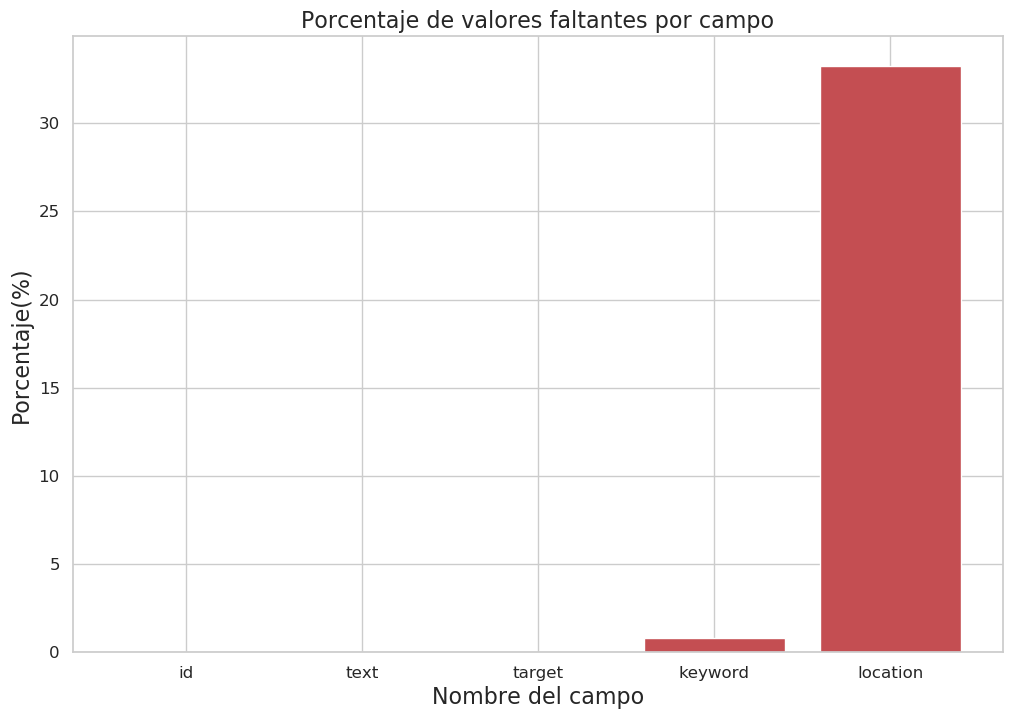

In [2142]:
# Tamaño
plt.figure(figsize=(12,8))
# Título
plt.title('Porcentaje de valores faltantes por campo', fontsize=16)
# Eje X
plt.xlabel('Nombre del campo')
# Eje Y
plt.ylabel('Porcentaje(%)')
plt.bar(height=nulls["porcentaje"], x=nulls["index"], color='C3')

plt.show()

En el grafico podemos observar que el dataframe, en general, está bastante completo, la columna "location" tiene casi la totalidad de los datos faltantes mientras que "keyword" apenas tiene algunos nulls, lo cual nos va a ser muy conveniente a la hora de analizar los datos.

## 2.1.2 Limpieza de datos faltantes

Vamos a realizar el análisis de datos faltantes de tal manera que al manera que al usarlos tengamos datos correctos

In [2143]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Los valores nulos en los campos  location y keyword serán reemplazados por cadenas de carecteres con valores 'sin location' y 'sin keyword' respectivamente.

In [2144]:
df['location'].fillna(value='sin location', inplace=True)
df['keyword'].fillna(value='sin keyword', inplace=True)
df.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

## 2.2 Analisis de los targets

Ahora analizaremos el target de los tweets que nos dirá si son verdaderos (target=1) o falsos (target=0).

<Figure size 100x100 with 0 Axes>

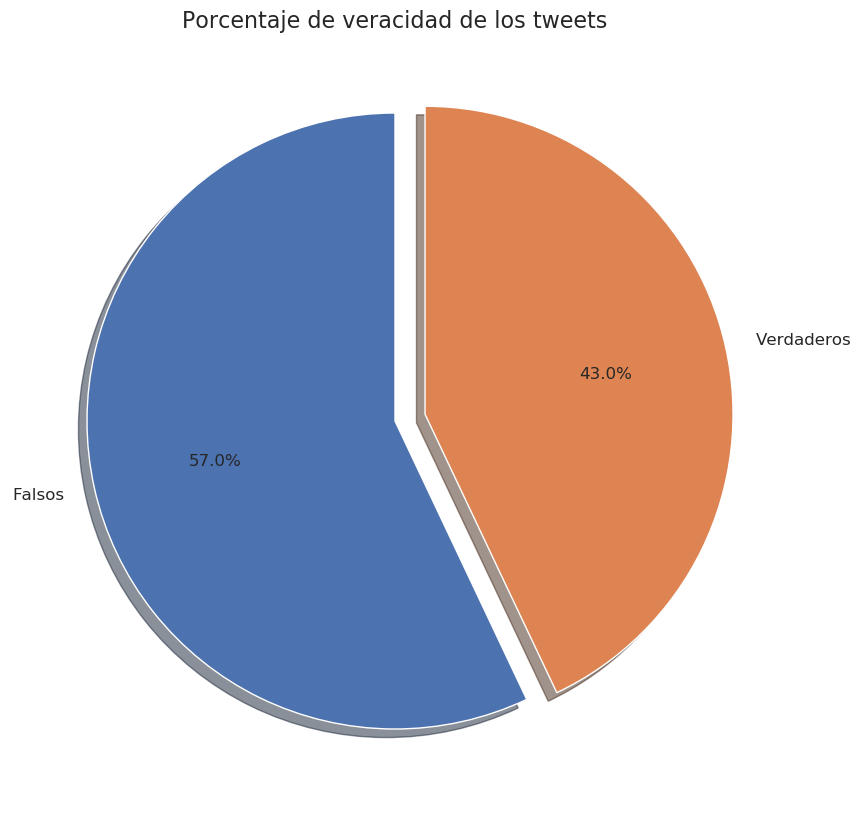

In [2145]:
tweets_reales = df[df['target'] == 1]
tweets_falsos = df[df['target'] == 0]
cant_verdaderos = tweets_reales['target'].count()
cant_falsos = tweets_falsos['target'].count()

# Tamaño
plt.figure(figsize=(1,1))
fig1, ax1 = plt.subplots()
ax1.pie([cant_falsos, cant_verdaderos], explode=(0, 0.1), labels=['Falsos', 'Verdaderos'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Porcentaje de veracidad de los tweets", fontsize=16)
plt.show()

Se observa que más de la mitad de los tweets del set de datos son falsos lo que nos indicaría, a priori, que hay que tener cuidado con lo que se observa en Twiter.

## 2.3 Analisis de las keywords o palabras claves

En esta sección analizaremos a las "keywords" o "palabras claves" y como se relacionan con la veracidad de los tweets. Comenzaremos con un vistazo general a las keywords.

In [2146]:
keywords = pd.DataFrame(df['keyword'].value_counts())
keywords.columns = ['cantidad']
keywords.T

,sin keyword,fatalities,armageddon,deluge,harm,sinking,damage,body%20bags,windstorm,outbreak,...,deluged,battle,bush%20fires,war%20zone,rescue,forest%20fire,epicentre,threat,inundation,radiation%20emergency
cantidad,61,45,42,42,41,41,41,41,40,40,...,27,26,25,24,22,19,12,11,10,9


Tenemos 221 palabras claves diferentes y todas se repiten una cantidad considerable de veces por lo que casi no podemos filtrar ninguna. Veremos cuantos "empates" hay para poder graficar lo mejor que se pueda.

Text(0, 0.5, 'Cantidad de keyword')

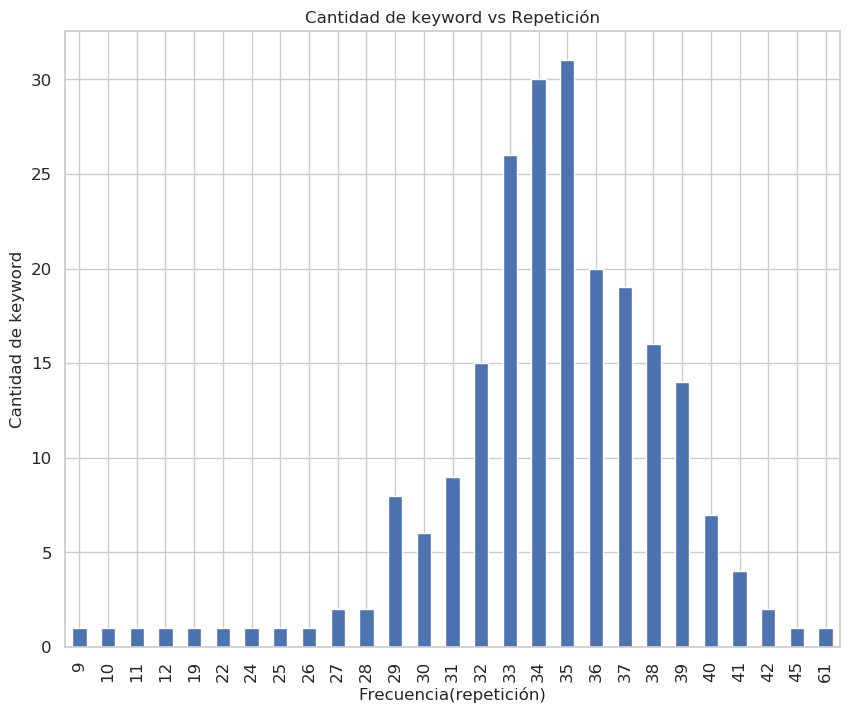

In [2147]:
keywords_sizekeywords_size = keywords.groupby(['cantidad'])['cantidad'].agg('size')
keywords_size.plot(kind="bar",  figsize=(10, 8), title = 'Cantidad de keyword vs Repetición' )
plt.xlabel('Frecuencia(repetición)', fontsize= 12)
plt.ylabel("Cantidad de keyword", fontsize= 12)

Efectivamente hay bastantes palabras claves que comparten el número de veces que aparecen, tenemos 15 palabras claves que se repiten 32 veces, hay 30 que se repiten 34 veces,etc. Casi todas aparecen más de 30 veces así que si quisieramos graficar las palabras claves que más aparecen, tendriamos que filtar la mayoría ya que sino nos quedaría un gráfico saturado y poco entendible.
A continuación veremos cuales son las palabras claves más utilizada bajo el criterio de que deben tener más de 40 apariciones.

Text(0, 0.5, 'Cantidad de apariciones')

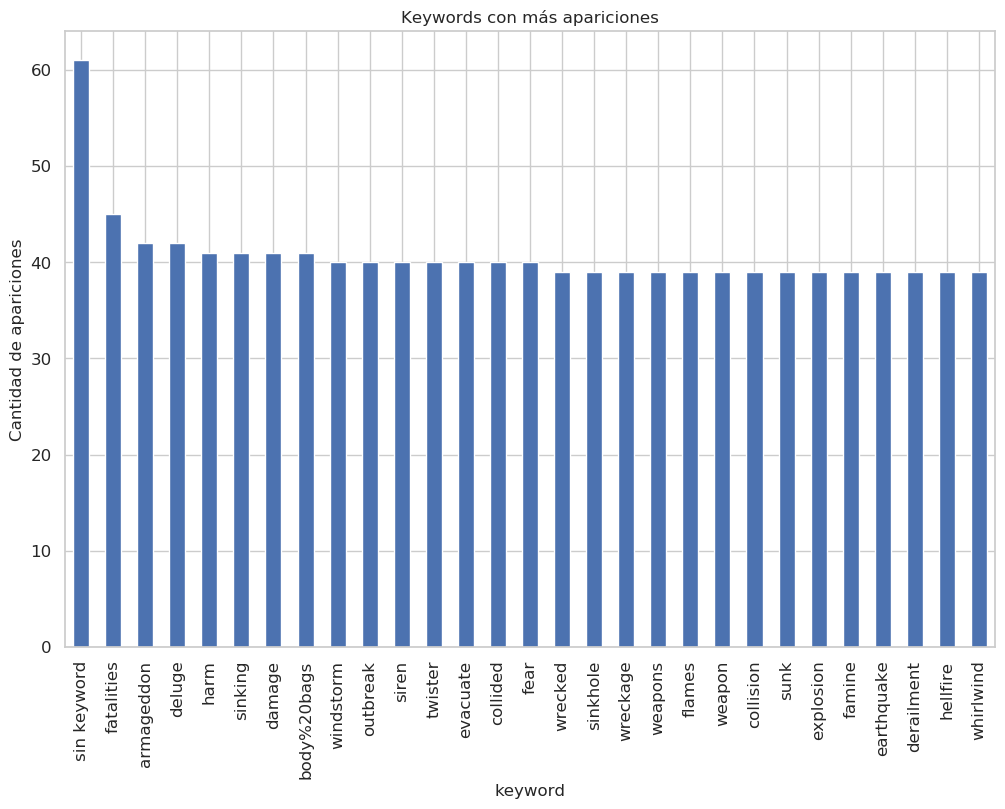

In [2148]:
keywords_filtradas = keywords.loc[keywords.cantidad > 38] # <=34 da un grafico horrible
keywords_filtradas["cantidad"].plot(kind="bar",title = 'Keywords con más apariciones' , figsize=(12,8))
plt.xlabel('keyword', fontsize= 12)
plt.ylabel("Cantidad de apariciones", fontsize= 12)

"Fatalidades" es la palabra clave con más repeticiones seguida de "armageddon" y "delunge". Se observa que la totalidad de las palabras claves tienen que ver con desastres, accidentes, inundaciones, etc.

Ahora nos fijaremos en las palabras claves menos usadas, de igual forma filtraremos y nos quedaremos con las que aparecen menos de 20 veces.

Text(0, 0.5, 'Cantidad de apariciones')

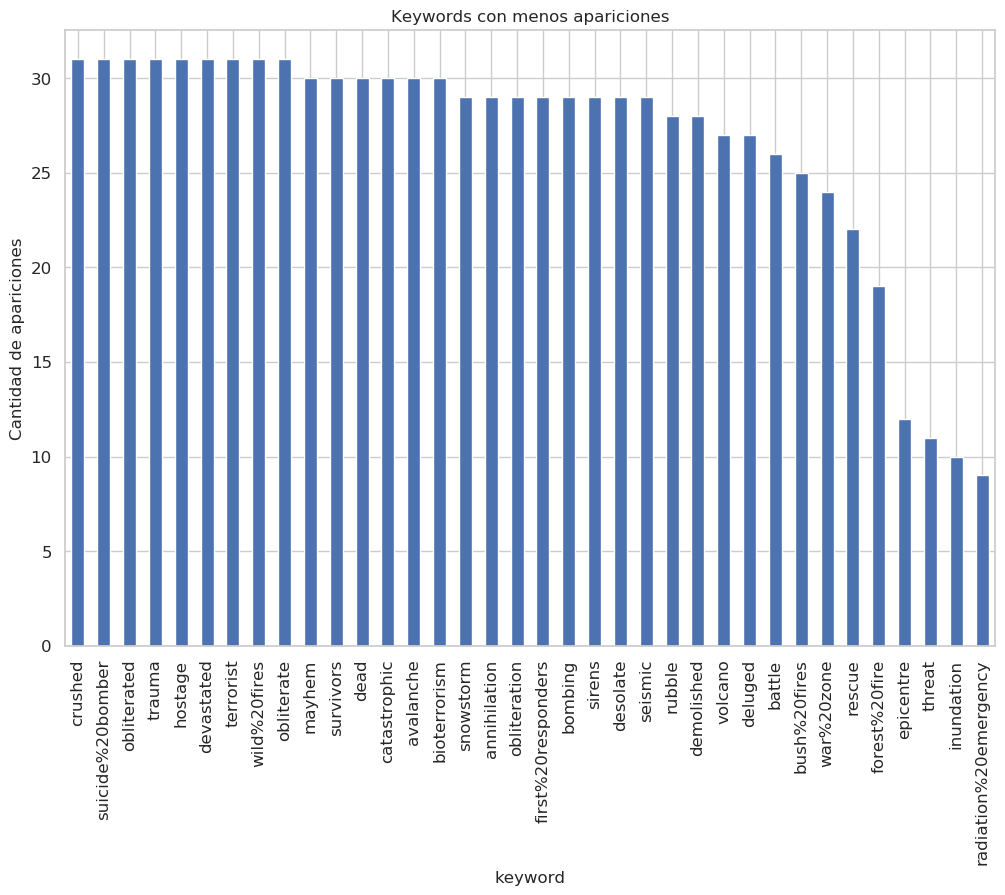

In [2149]:
keywords_filtradas = keywords.loc[keywords.cantidad < 32]
keywords_filtradas["cantidad"].plot(kind="bar",title = 'Keywords con menos apariciones' , figsize=(12,8))
plt.xlabel('keyword', fontsize= 12)
plt.ylabel("Cantidad de apariciones", fontsize= 12)

Las keywords menos usadas también tiene relación con desastres por lo que el analisis no es muy util o significativo.

## 2.3.1 Relación entre las palabras clave y target

Ahora veremos como se relacionan las keywords con el target. En este primer analisis buscaremos cuales son las 70 keywords que más se usan en tweets verdaderos y las 70 que más se usan en tweets falsos.

In [2150]:
ranking = 50

ndf = df.groupby(['keyword', 'target']).agg({'target': 'count'})
ndf = ndf.unstack(level=1)
ndf = ndf.reset_index()
ndf = ndf.droplevel(0, axis=1)
ndf.columns=['keyword', 'Tweets falsos', 'Tweets verdaderos'] 
ndf['Tweets verdaderos'].fillna(0, inplace=True)
ndf['Tweets falsos'].fillna(0, inplace=True)
ndf['keyword'].fillna('empty', inplace=True)
ndf = ndf.set_index('keyword')
ndf = ndf[(ndf['Tweets verdaderos'] + ndf['Tweets falsos']) > 30] # Aparición de 'keyword' mayor a 30 veces
ndf = ndf.apply(lambda x: x*100/sum(x), axis=1)
top_falsos = ndf.sort_values('Tweets falsos', ascending=False).head(ranking)
top_verdaderos = ndf.sort_values('Tweets verdaderos', ascending = False).head(ranking)
top_verdaderos


,Tweets falsos,Tweets verdaderos
keyword,,
debris,0.00,100.00
wreckage,0.00,100.00
derailment,0.00,100.00
outbreak,2.50,97.50
typhoon,2.63,97.37
oil%20spill,2.63,97.37
suicide%20bombing,3.03,96.97
suicide%20bomber,3.23,96.77
rescuers,8.57,91.43


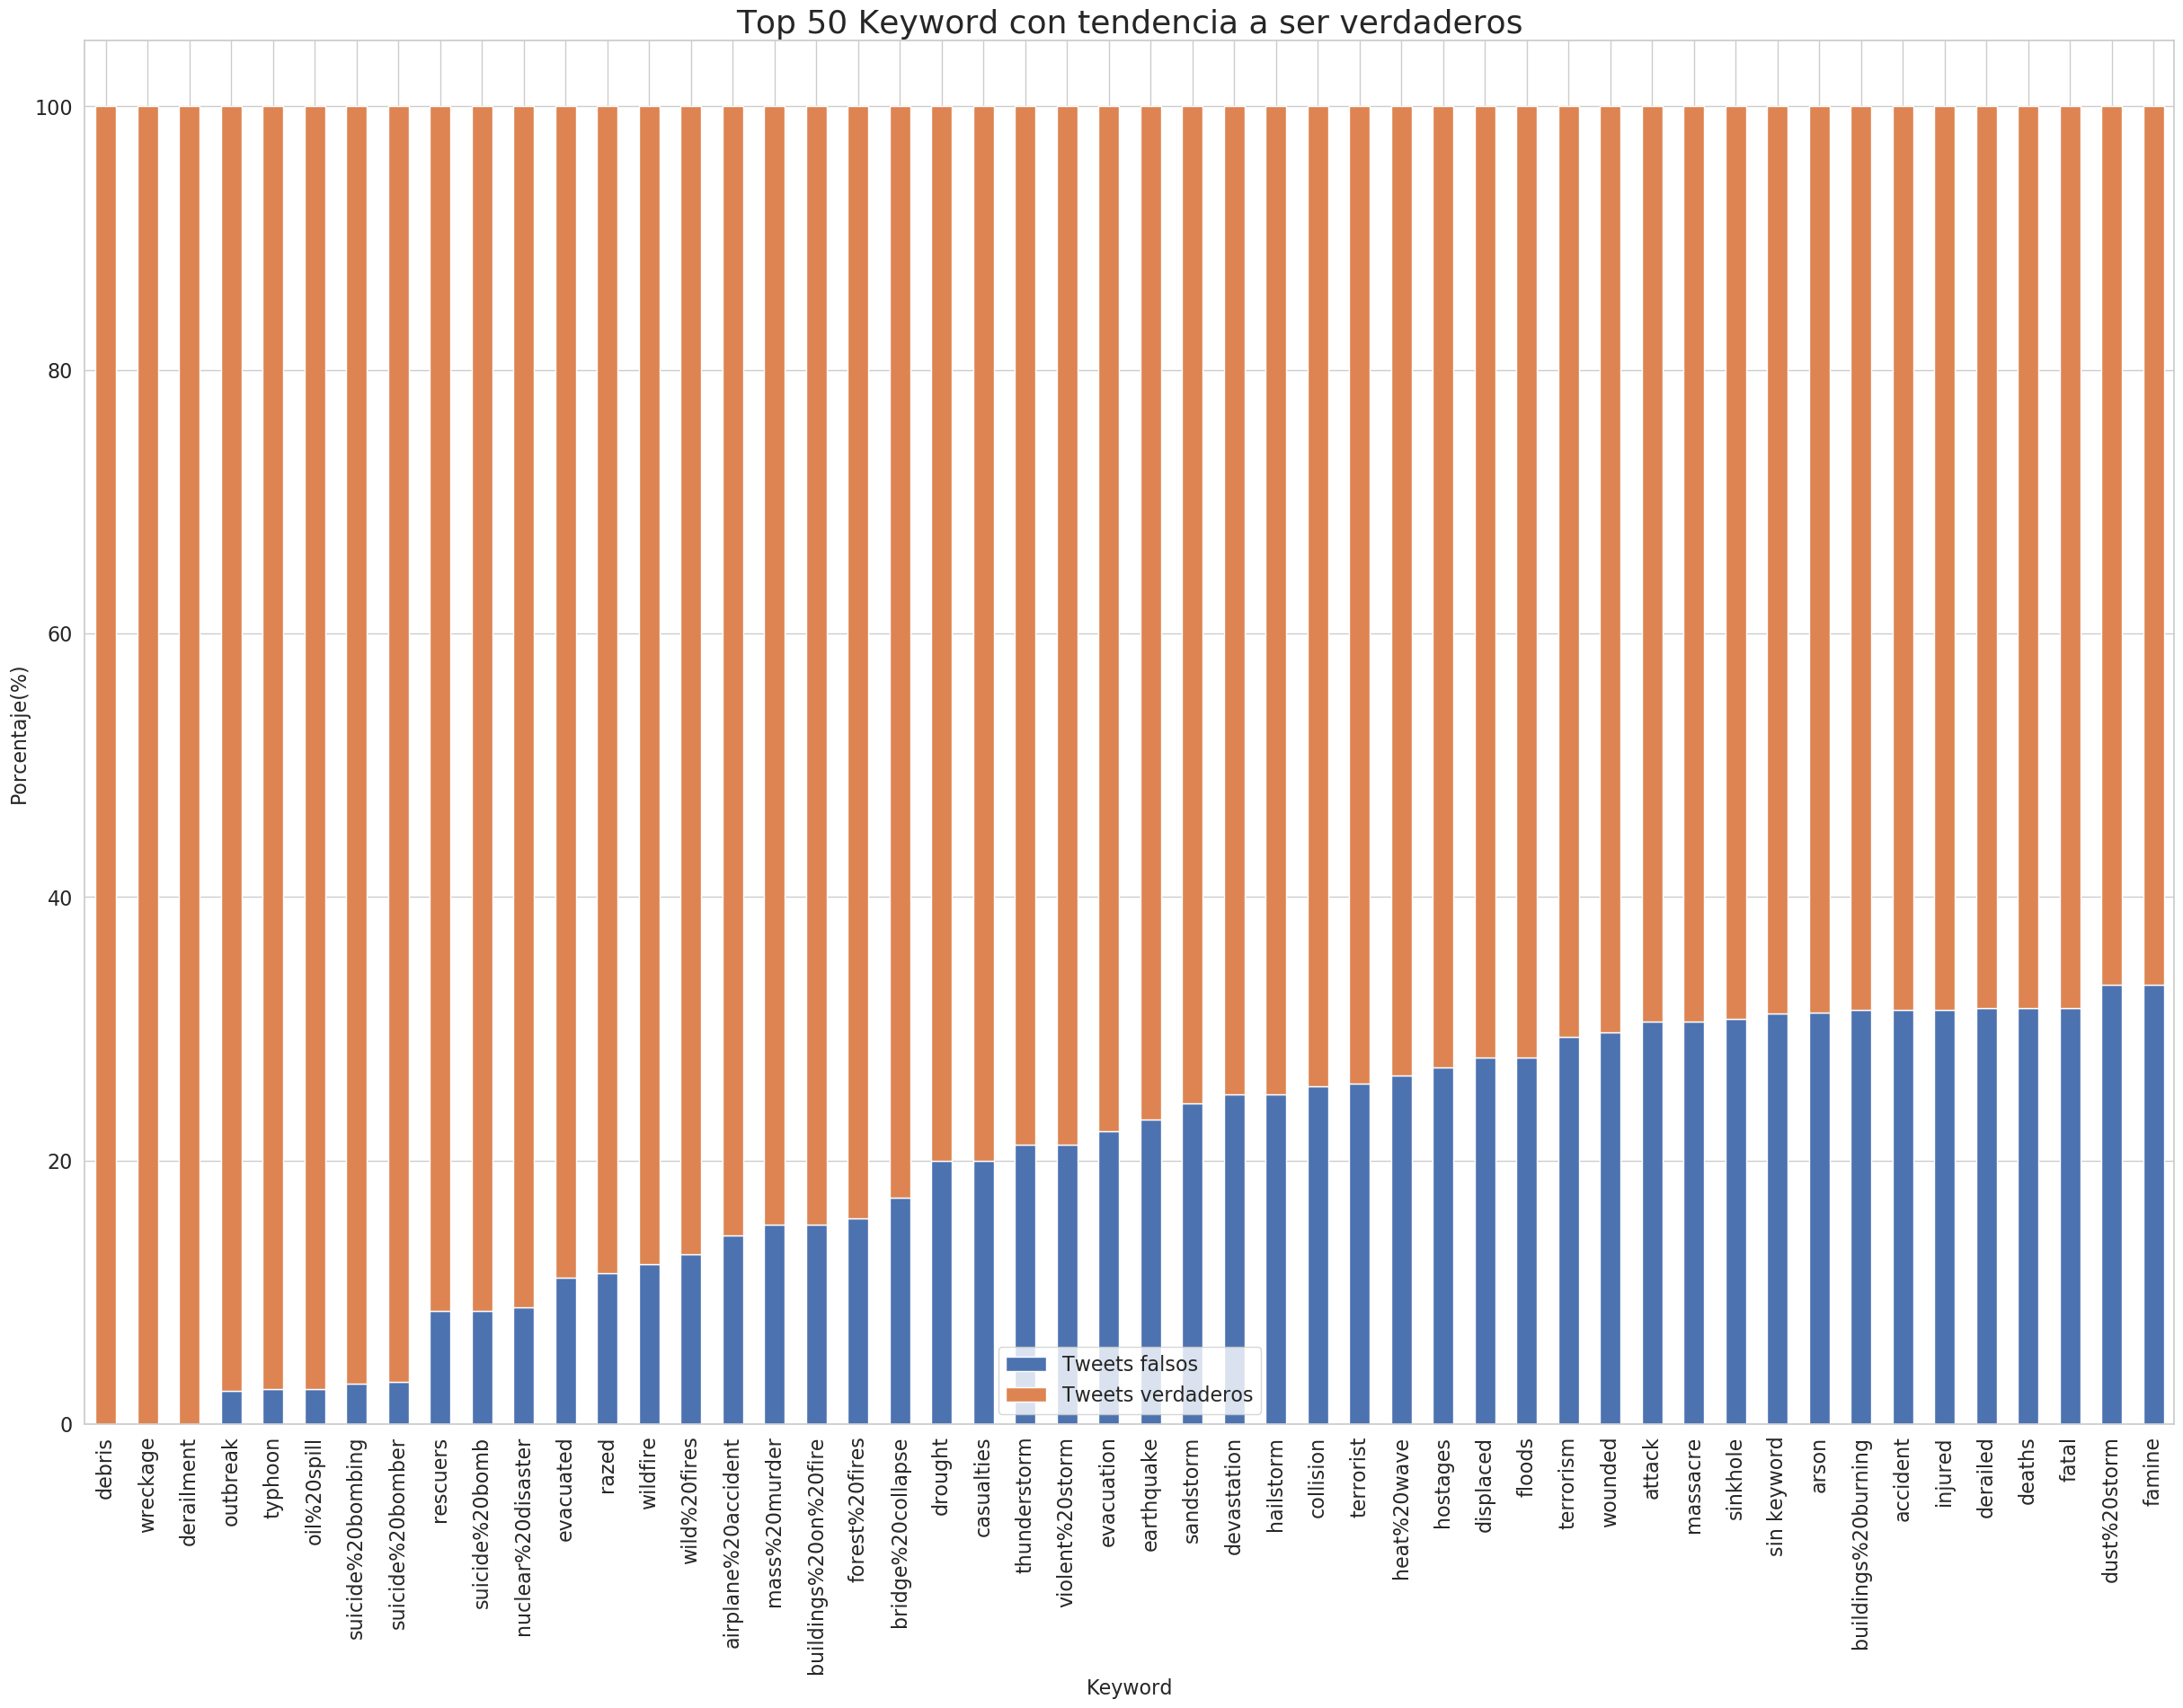

In [2151]:
ax = top_verdaderos.plot(kind="bar", stacked=True, fontsize= 16, figsize=(30, 20))
plt.title('Top '+str(ranking)+' Keyword con tendencia a ser verdaderos', fontsize=26)
plt.xlabel("Keyword", fontsize= 16)
plt.ylabel("Porcentaje(%)", fontsize= 16)
plt.legend(fontsize=16)

Tenemos 2 palabras que siempre que se usan son verdaderas (continuar).

En general podemos notar que casi todas las palabras se refieren a eventos de gran repercusión como incendios, inundaciones, accidentes, desastres naturales, terrorismo,etc.

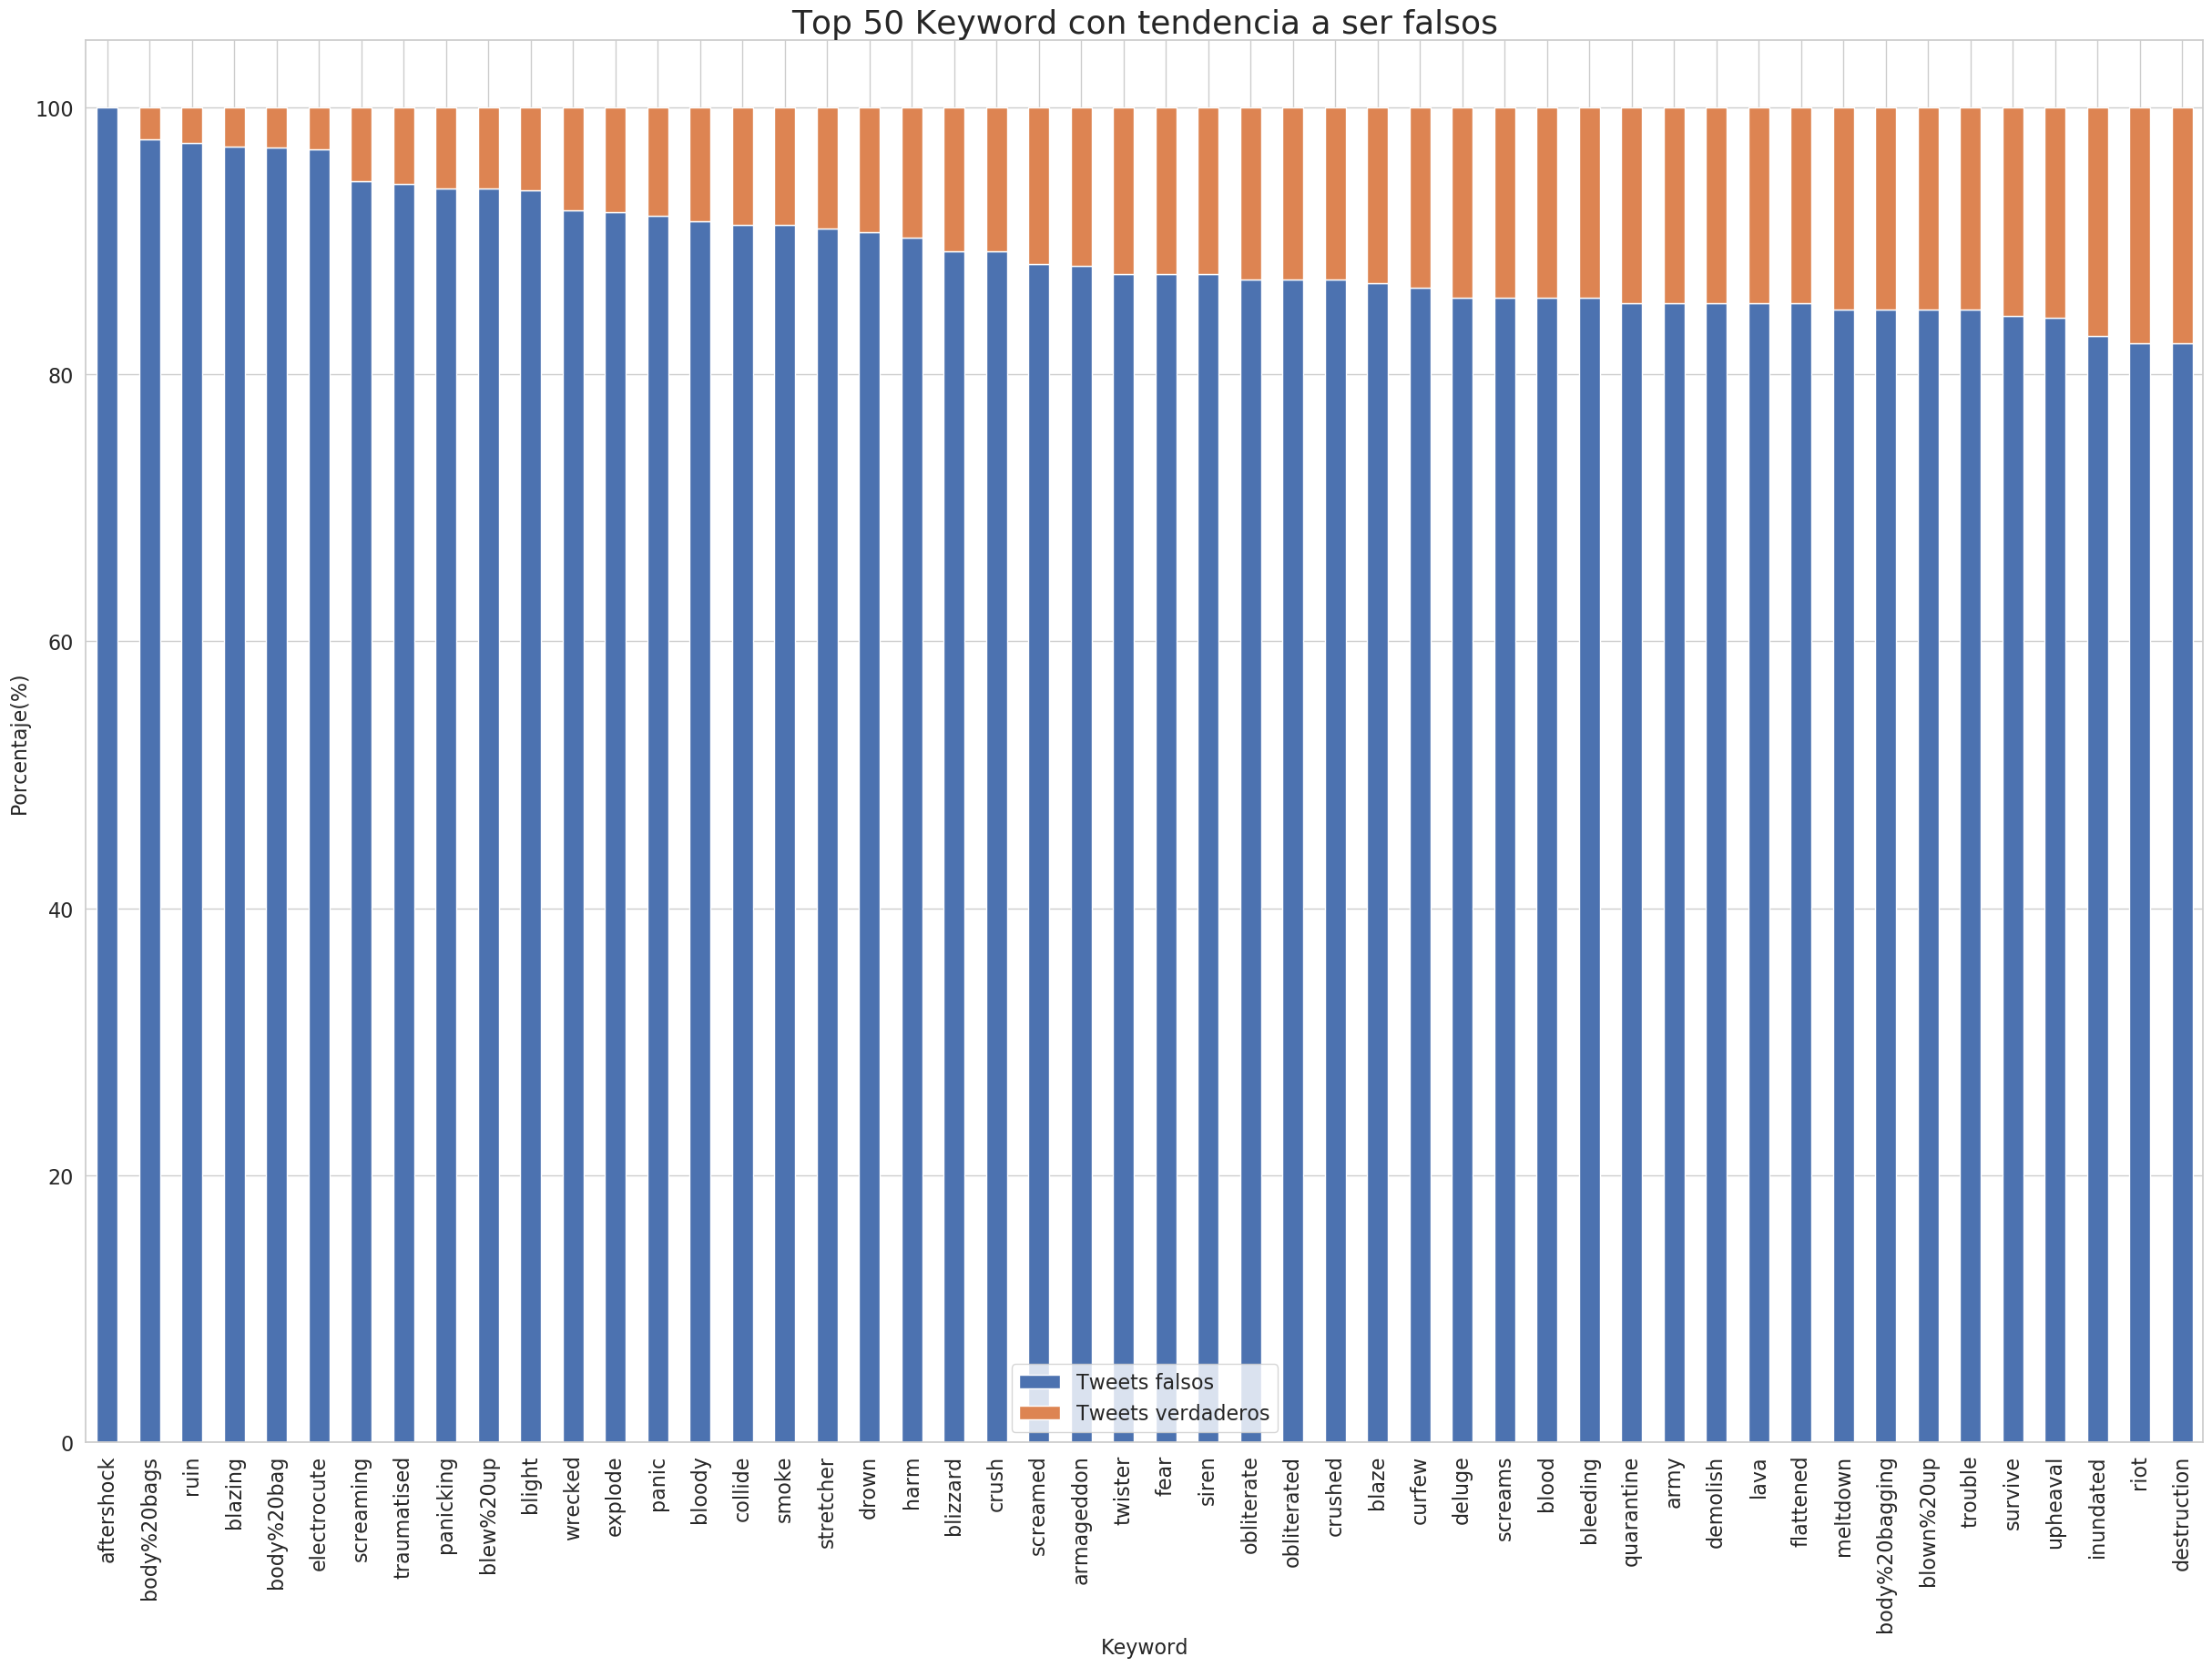

In [2152]:
ax = top_falsos.plot(kind="bar", stacked=True, fontsize= 16, figsize=(30, 20))
plt.title('Top '+str(ranking)+' Keyword con tendencia a ser falsos', fontsize=26)
plt.xlabel("Keyword", fontsize= 16)
plt.ylabel("Porcentaje(%)", fontsize= 16)
plt.legend(fontsize=16)

Analisis del grafico

Conclusión general: en el primer analisis vemos que se utilizan palabras técnicas como "" muy comunes en medios de comunicación o entidades importantes mientras que en el segundo se utilizan palabras más de uso común como "miedo","pánico","sangriento" que parecen venir más de de "personas comunes" que podrían estar difundiendo información falsa. ( no me convence) 

## 2.3.2 Analisis de la veracidad según los caracteres especiales

Ahora procederemos a analizar la veracidad de los tweets teniendo en cuenta algunos caracteres especiales que pueden tener, en este caso serán el arroba ('@'), el hashtag ('#'), si tiene un link ('http') o sino tiene ninguno de ellos.

In [2153]:
df_ext = df.copy()
df_ext['largo_del_texto'] = df_ext['text'].apply(len)
df_ext['mencion'] = df_ext['text'].str.contains('@').astype(int)
df_ext['hashtag'] = df_ext['text'].str.contains('#').astype(int)
df_ext['url'] = df_ext['text'].str.contains('http').astype(int)
df_ext['Sin caracteres especiales'] =  ((df_ext['text'].str.contains('@') == False) & \
(df_ext['text'].str.contains('#')  == False) & \
(df_ext['text'].str.contains('http') == False)).astype(int)
df_ext.tail(10)

,id,keyword,location,text,target,largo_del_texto,mencion,hashtag,url,Sin caracteres especiales
7603,10862,sin keyword,sin location,Officials say a quarantine is in place at an A...,1,136,0,0,1,0
7604,10863,sin keyword,sin location,#WorldNews Fallen powerlines on G:link tram: U...,1,136,0,1,1,0
7605,10864,sin keyword,sin location,on the flip side I'm at Walmart and there is a...,1,114,0,0,0,1
7606,10866,sin keyword,sin location,Suicide bomber kills 15 in Saudi security site...,1,121,0,0,1,0
7607,10867,sin keyword,sin location,#stormchase Violent Record Breaking EF-5 El Re...,1,134,0,1,1,0
7608,10869,sin keyword,sin location,Two giant cranes holding a bridge collapse int...,1,83,0,0,1,0
7609,10870,sin keyword,sin location,@aria_ahrary @TheTawniest The out of control w...,1,125,1,0,0,0
7610,10871,sin keyword,sin location,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,0,0,1,0
7611,10872,sin keyword,sin location,Police investigating after an e-bike collided ...,1,137,0,0,0,1
7612,10873,sin keyword,sin location,The Latest: More Homes Razed by Northern Calif...,1,94,0,0,1,0


In [2154]:
tweets_red = df_ext[['target', 'mencion', 'hashtag', 'url', 'Sin caracteres especiales']]
plotdata = tweets_red.groupby('target').agg({'url': 'sum', 'mencion':  'sum', 'hashtag': 'sum', 'Sin caracteres especiales': 'sum'})
plotdata.columns = ['Contiene URL(http)', 'Contiene mención(@user)', 'Contiene Hashtag(#)', 'Sin caracteres especiales']
plotdata = plotdata.transpose()
plotdata[0] = plotdata[0]*100/cant_falsos
plotdata[1] = plotdata[1]*100/cant_verdaderos
plotdata.columns = ['Tweets falsos', 'Tweets verdaderos']
plotdata

,Tweets falsos,Tweets verdaderos
Contiene URL(http),41.43,66.40
Contiene mención(@user),31.39,20.67
Contiene Hashtag(#),20.41,26.75
Sin caracteres especiales,30.56,15.81


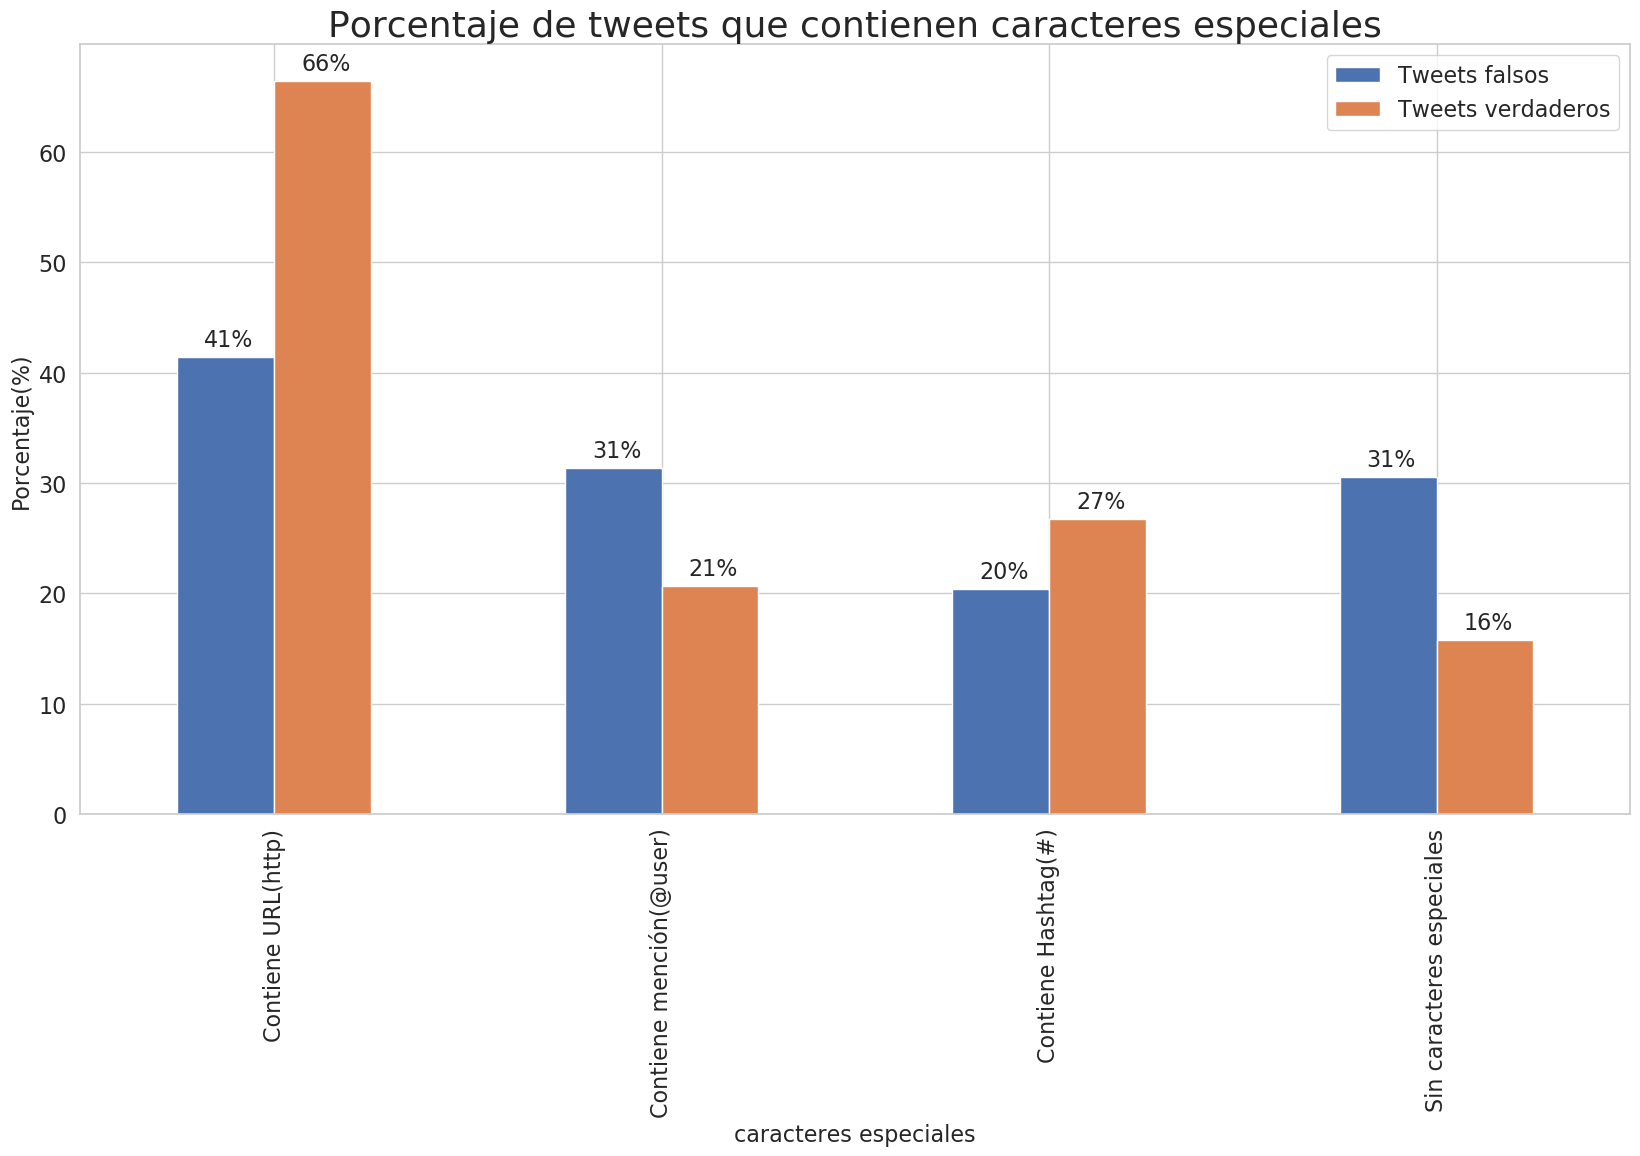

In [2155]:
ax = plotdata.plot(kind="bar", stacked=False, fontsize= 16)
plt.title("Porcentaje de tweets que contienen caracteres especiales", fontsize=26)
plt.xlabel("caracteres especiales", fontsize= 16)
plt.ylabel("Porcentaje(%)", fontsize= 16)
plt.legend(fontsize=16)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.0%}".format(height/100), xy=(x+0.07, y + height + 1), fontsize=16)

Conclusion

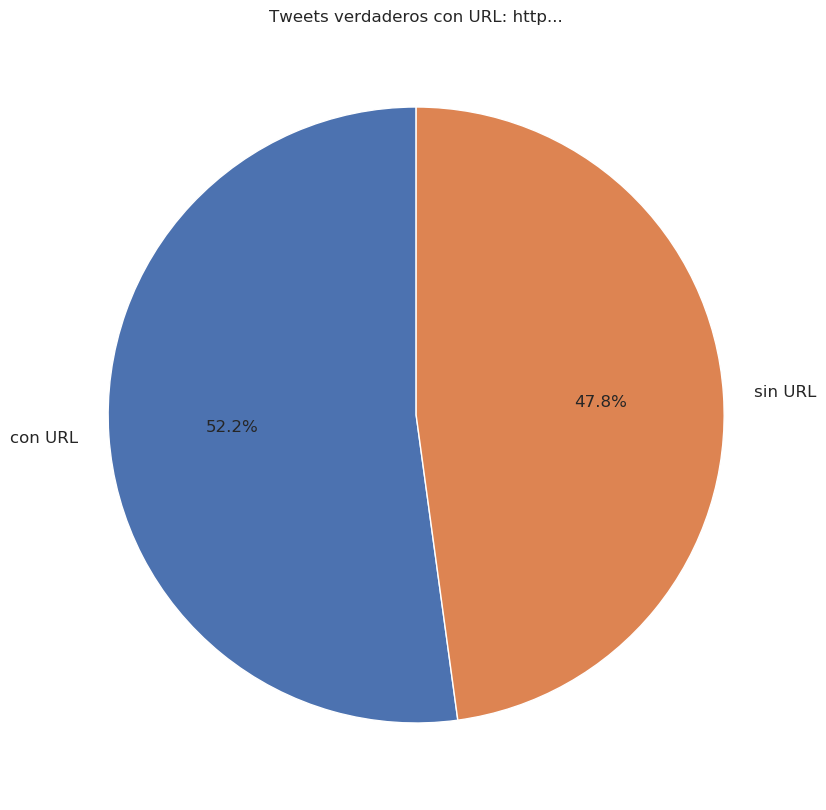

In [2156]:
tw_reales_con_link = df_ext[df_ext['url'] == True]['url'].count()
tw_reales_sin_link = df_ext[df_ext['url'] == False]['url'].count()
grafico = plt.pie([tw_reales_con_link, tw_reales_sin_link],labels=['con URL', 'sin URL'], startangle=90, autopct='%1.1f%%')
plt.title("Tweets verdaderos con URL: http...")
plt.show(grafico)

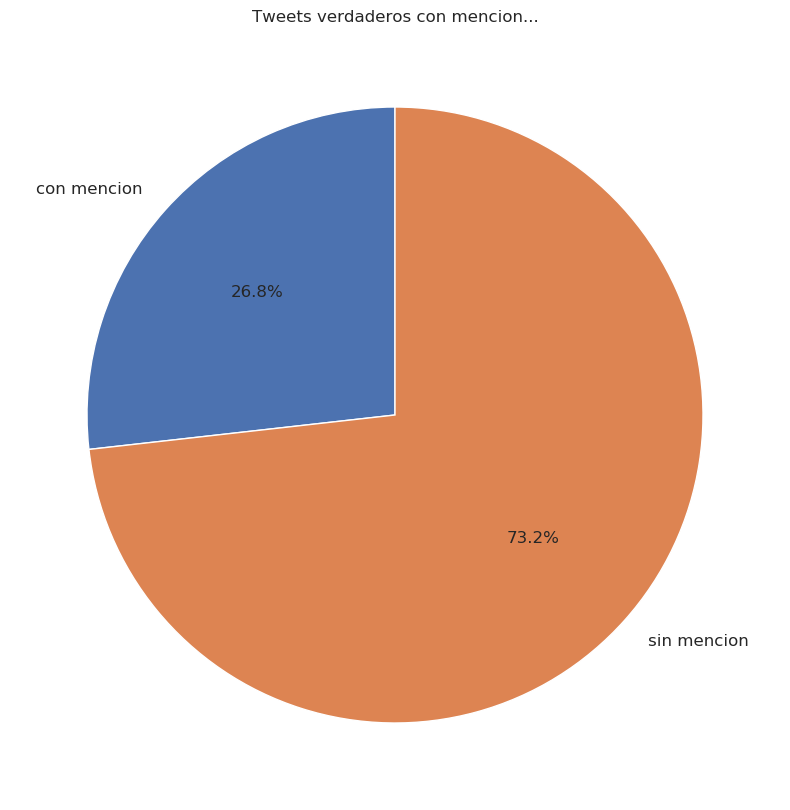

In [2157]:
tw_reales_con_mencion = df_ext[df_ext['mencion'] == True]['mencion'].count()
tw_reales_sin_mencion = df_ext[df_ext['mencion'] == False]['mencion'].count()
grafico = plt.pie([tw_reales_con_mencion, tw_reales_sin_mencion],labels=['con mencion', 'sin mencion'], startangle=90, autopct='%1.1f%%')
plt.title("Tweets verdaderos con mencion...")
plt.show(grafico)

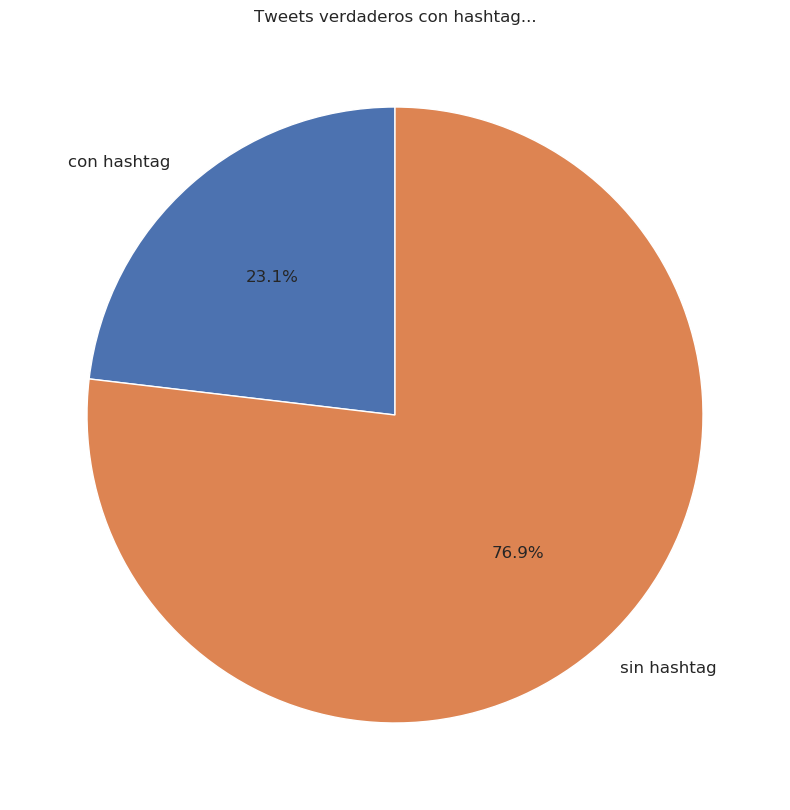

In [2158]:
tw_reales_con_hashtag = df_ext[df_ext['hashtag'] == True]['hashtag'].count()
tw_reales_sin_mencion = df_ext[df_ext['hashtag'] == False]['hashtag'].count()
grafico = plt.pie([tw_reales_con_hashtag, tw_reales_sin_mencion],labels=['con hashtag', 'sin hashtag'], startangle=90, autopct='%1.1f%%')
plt.title("Tweets verdaderos con hashtag...")
plt.show(grafico)

<h2> 2.3.3 Palabras más frecuentes en tweets</h2>

En está sección nos fijaremos cuales son las palabras que más se repiten en los tweets, tantos verdaderos como en los falsos, lo que nos ayudará a poder identificar la veracidad de un tweet (entre otros datos) viendo las palabras que contienen.
Empezaremos viendo las 20 palabras más frecuentes en los tweets verdaderos.

In [2159]:
#Funcion para dividir texto en lista de palabras
def split(txt, seps):
    default_sep = seps[0]
    for sep in seps[1:]:
        txt = txt.replace(sep, default_sep)
    return [i.strip() for i in txt.split(default_sep)]

#Funcion para contar palabras en listas y almacenar en un diccionario
def agregar(words_dict, new_words):
    for word in new_words:
        if word in words_dict:
            words_dict[word] += 1
        else:
            words_dict[word] = 1

In [2160]:
verdaderos_words_dict = {}
tweets_verdaderos = df[df.target == 1]
tweets_verdaderos["text"].apply(lambda x: split(x, (',','.',' '))).apply(lambda x: agregar(verdaderos_words_dict, x))
verdaderos_palabras = pd.DataFrame.from_dict(verdaderos_words_dict, orient='index')
verdaderos_palabras.sort_values(by=0, ascending=False).head(20)

,0
,3610
http://t,2335
the,1060
in,1043
of,890
a,747
to,707
and,467
-,390
on,389


Como podia esperarse son en su mayoria articulos, pronombres, preposiciones, etc.
Probablemente estos también sean las palabras más frecuentes en tweets falsos. Si eleminamos de nuestro conjunto las palabras frecuentes que tengan en común lograremos filtrar la mayoria de estas palabras irrelevantes y además nos quedaran aquellas que son menos frecuentes en los tweets falsos.

In [2161]:
tweets_falsos = df[df.target == 0]
falsos_words_dict = {}
tweets_falsos["text"].apply(lambda x: split(x, (',','.',' '))).apply(lambda x: agregar(falsos_words_dict, x))
falsos_palabras = pd.DataFrame.from_dict(falsos_words_dict, orient='index')
falsos_keys = falsos_palabras.sort_values(by=0, ascending=False).head(100).index
#Aún con el filtrado quedan algunas palabras irrelevantes. Las elimino manualmente 
irrelevantes_keys = ['over', 'were', 'than', 'More', 'S', 'This']
verdaderos_top_palabras = verdaderos_palabras.drop(labels=falsos_keys).drop(labels=irrelevantes_keys).sort_values(by=0, ascending=False).head(20)
verdaderos_top_palabras


,0
fire,123
California,94
killed,86
suicide,71
fires,70
Hiroshima,62
disaster,62
Northern,60
train,58
bomb,57


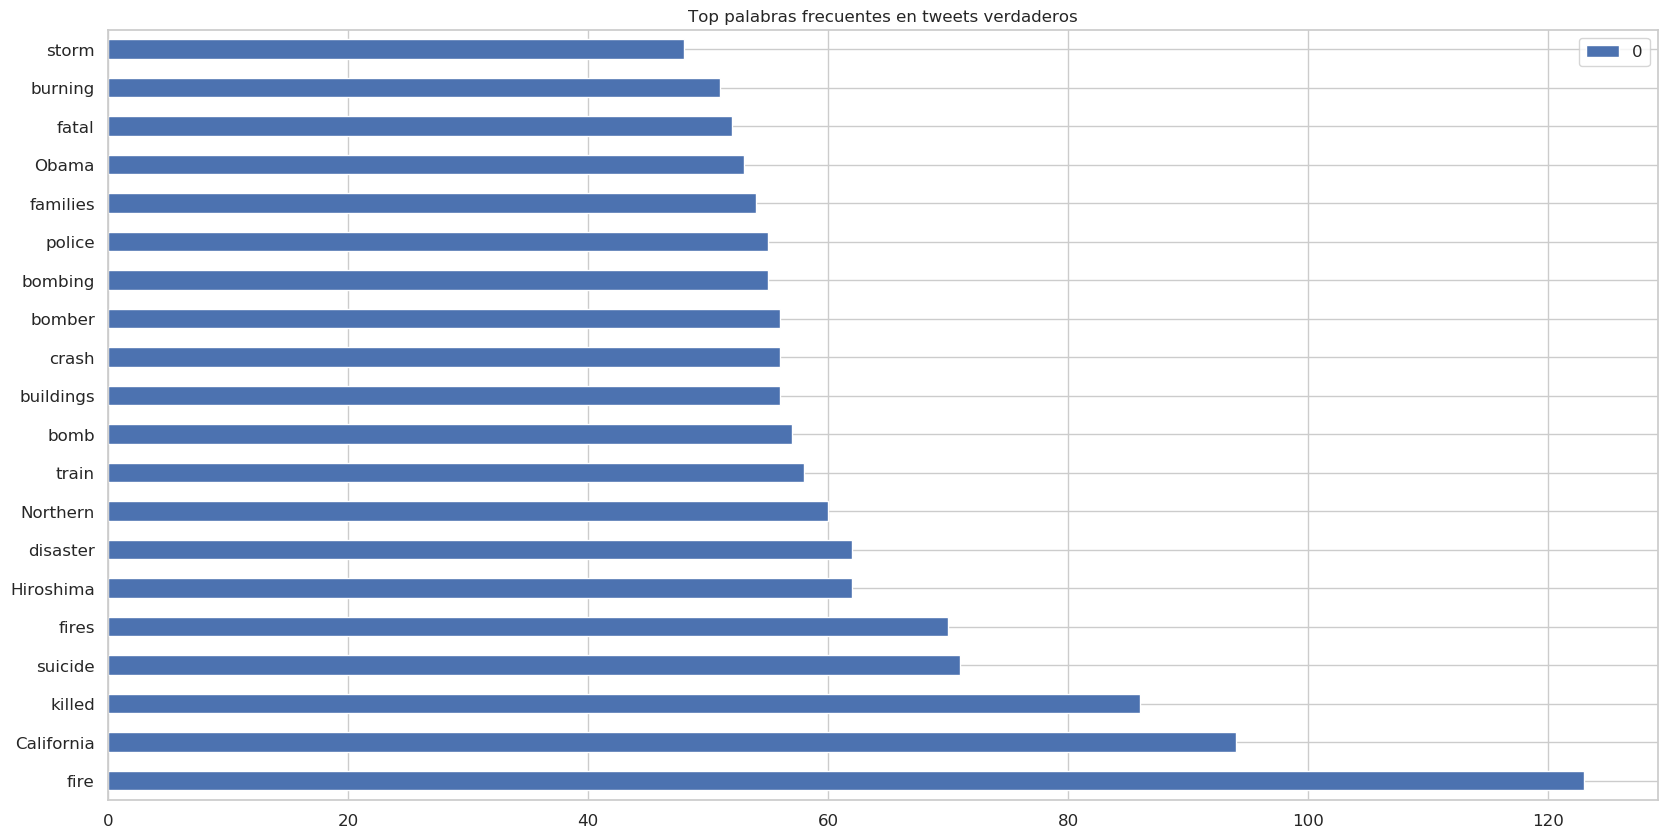

In [2162]:
verdaderos_top_palabras.head(20).plot(kind = 'barh', figsize = (20, 10), rot = 0, title = "Top palabras frecuentes en tweets verdaderos")

Se puede notar que hay varias palabras que son similares como "fire", "fires" y "burning" o "bomb", "bomber" y "bombing". (continuar) 

Como curiosidad, "Obama" está entre las palabras que más se usan en tweets verdaderos, no sabemos si lo que dicen es bueno o malo pero debe ser verdad.

Procedemos realizar lo mismo con los tweets falsos. Esta vez directamente filtraremos las palabras comunes.

In [2163]:
#Debo quitar dos palabras de las keys a eliminar porque no aparecen en las palabras de los tweets falsos, lo que ocaciona error
verdaderos_keys = verdaderos_palabras.drop(['Northern', 'bomber']).sort_values(by=0, ascending=False).head(100).index
falsos_palabras.drop(labels=verdaderos_keys).sort_values(by=0, ascending=False).head(20)

,0
??,187
i,119
he,109
can,107
if,107
do,93
don't,88
her,87
new,86
his,86


In [2164]:
irrelevantes_keys = ['can', 'if', 'do', 'don\'t', 'her', 'his', 'his', 'it\'s', 'would', 'now', 'what', 'You', 'My', 'how', 'got', '\'']
falsos_top_palabras = falsos_palabras.drop(labels=verdaderos_keys).drop(labels=irrelevantes_keys).sort_values(by=0, ascending=False).head(20)
falsos_top_palabras

,0
??,187
i,119
he,109
new,86
????,75
know,73
Full,69
New,69
see,68
video,68


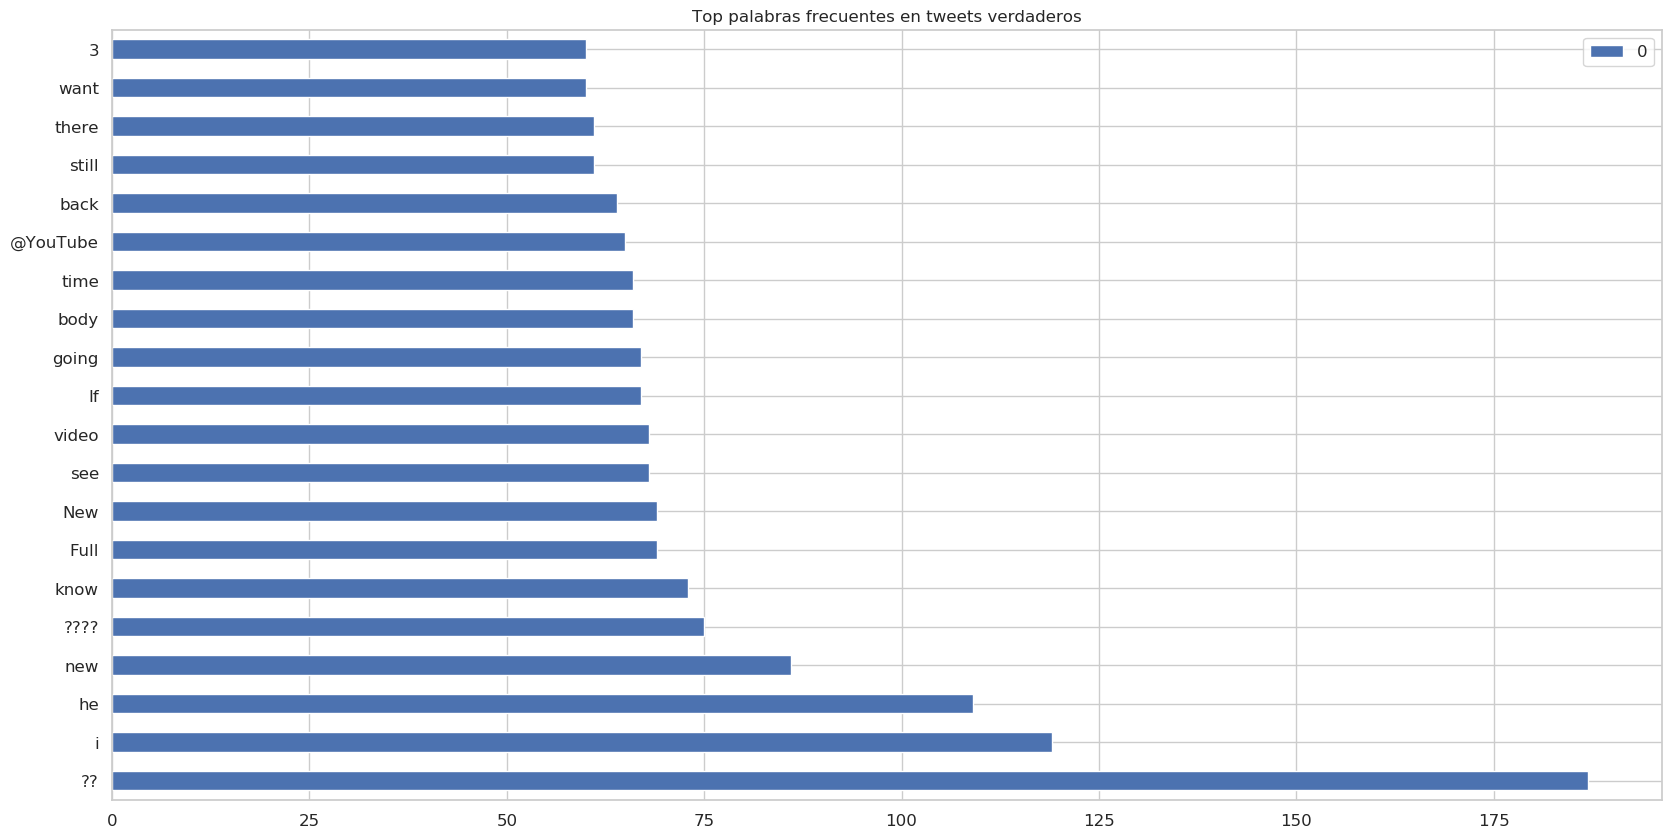

In [2165]:
falsos_top_palabras.head(20).plot(kind = 'barh', figsize = (20, 10), rot = 0, title = "Top palabras frecuentes en tweets verdaderos")

Podemos rescatar que el signo de interrogacion es usado frecuentemente en los tweets falsos. ( mejorar) 

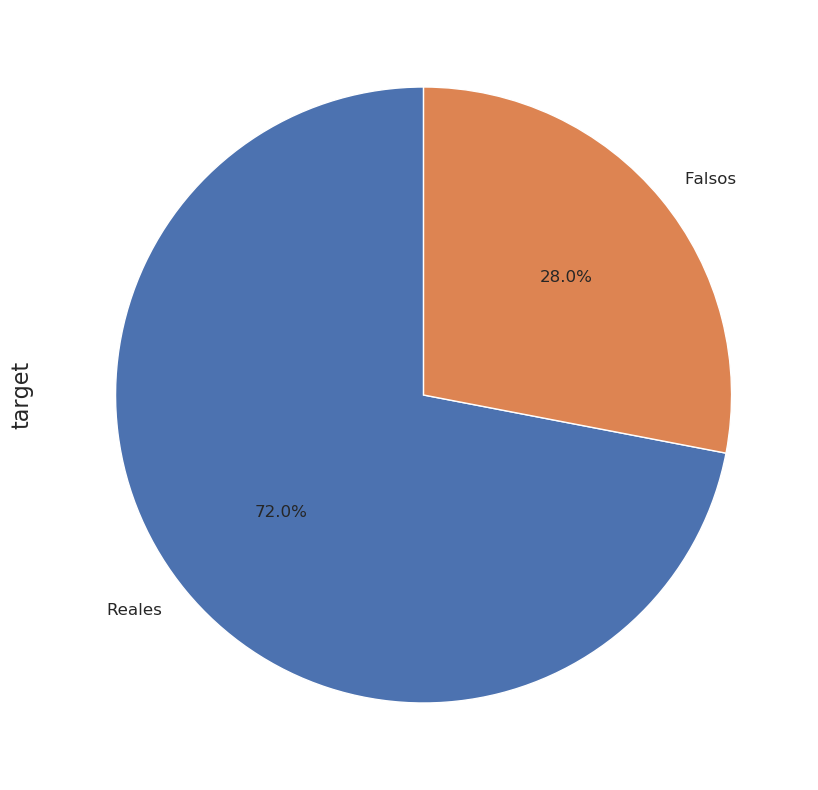

In [2166]:
df.loc[df['text'].str.contains('\?'), 'target'].value_counts().plot.pie(labels=['Reales', 'Falsos'], figsize = (10, 10), startangle=90, autopct='%1.1f%%')

Analisis de las ids ( no hay mucho, tal vez valga la pena sacarlo)

In [2167]:
ids = pd.DataFrame(df['id'].value_counts())
ids.columns = ['cantidad']
ids.loc[ids.cantidad > 2]
#cada id es unico y solo tuitea una vez

,cantidad


## 2.3.4 Repetición de tweets

En el análsis de la Estructura de los Datos se pudo detectar que había al menos un tweet que se repetia 10 veces. A partir de esto se profundizará su análsis y su relación y/o tendencia a ser verdadero o falso(de acuerdo al campo target).

In [2168]:
grouped_target = df.groupby(["text", "target"])["target"].count().sort_values(ascending=False).to_frame()
grouped_target.columns = ['cantidad']
grouped_target = grouped_target.reset_index()
grouped_target = grouped_target[grouped_target['cantidad'] > 1] # Tweets con repetición mayor a 1
grouped_target = grouped_target.groupby('target').agg({'cantidad': 'sum'})
falsos_count = grouped_target.iloc[0]
verdaderos_count = grouped_target.iloc[1]
grouped_target.reset_index()

,target,cantidad
0,0,47
1,1,110


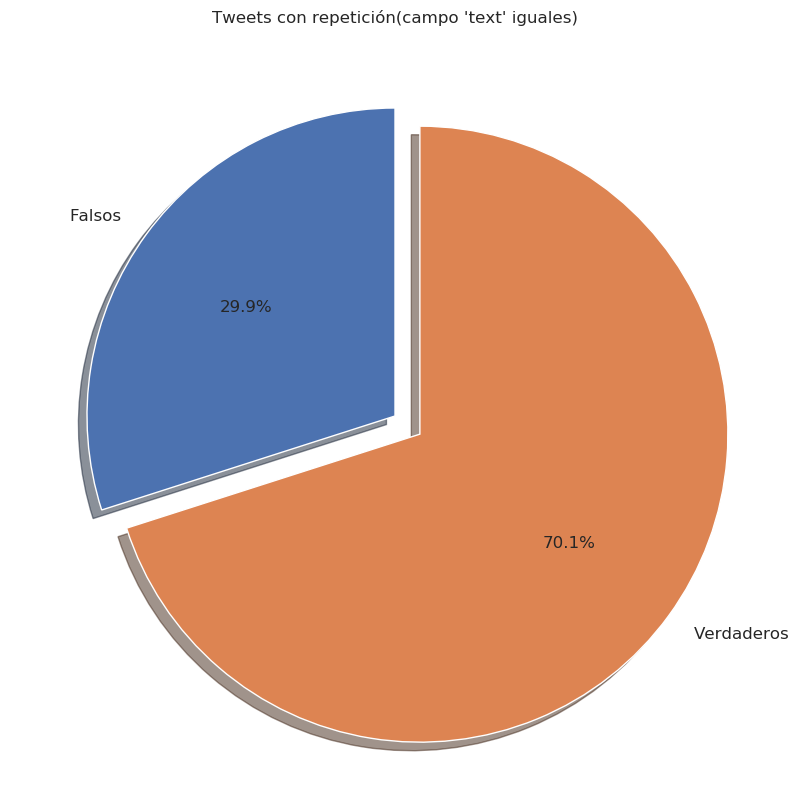

In [2169]:
fig, ax = plt.subplots()
ax.pie([falsos_count, verdaderos_count], explode=(0, 0.1), labels=['Falsos', 'Verdaderos'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Tweets con repetición(campo 'text' iguales)")
plt.show()

Podemos apreciar que la tendencia de los tweets que se repiten al menos una vez más son 'Verdaderos'

## 2.4 Analisis de las localizaciones

En esta sección analizaremos las localizaciones desde donde producen los tweets y su relación con los targets.

In [2170]:
n = 20 # Top n ciudades
grouped_by_location = df[df['location'] != 'sin location'].groupby(['location', 'target']).agg({'target': 'count'})
grouped_by_location = grouped_by_location.unstack(level=1)
grouped_by_location = grouped_by_location.reset_index()
grouped_by_location = grouped_by_location.droplevel(0, axis=1)
grouped_by_location[[0, 1]] = grouped_by_location[[0,1]].fillna(value=0)
grouped_by_location['General'] = grouped_by_location[0]+grouped_by_location[1]
grouped_by_location.columns=['Lugar', 'Falsos', 'Verdaderos', 'General']
top_n_general = grouped_by_location[['Lugar', 'General']].sort_values('General', ascending=False).head(n).iloc[::-1]
top_n_verdaderos = grouped_by_location[['Lugar', 'Verdaderos']].sort_values('Verdaderos', ascending=False).head(n).iloc[::-1]
top_n_falsos = grouped_by_location[['Lugar', 'Falsos']].sort_values('Falsos', ascending=False).head(n).iloc[::-1]
top_n_general

,Lugar,General
2249,San Francisco,14.00
577,"California, USA",15.00
1837,"New York, NY",15.00
934,Everywhere,15.00
574,California,17.00
368,Australia,18.00
654,"Chicago, IL",18.00
2868,Worldwide,19.00
1373,Kenya,20.00
2778,"Washington, DC",21.00


Descripción de la tabla

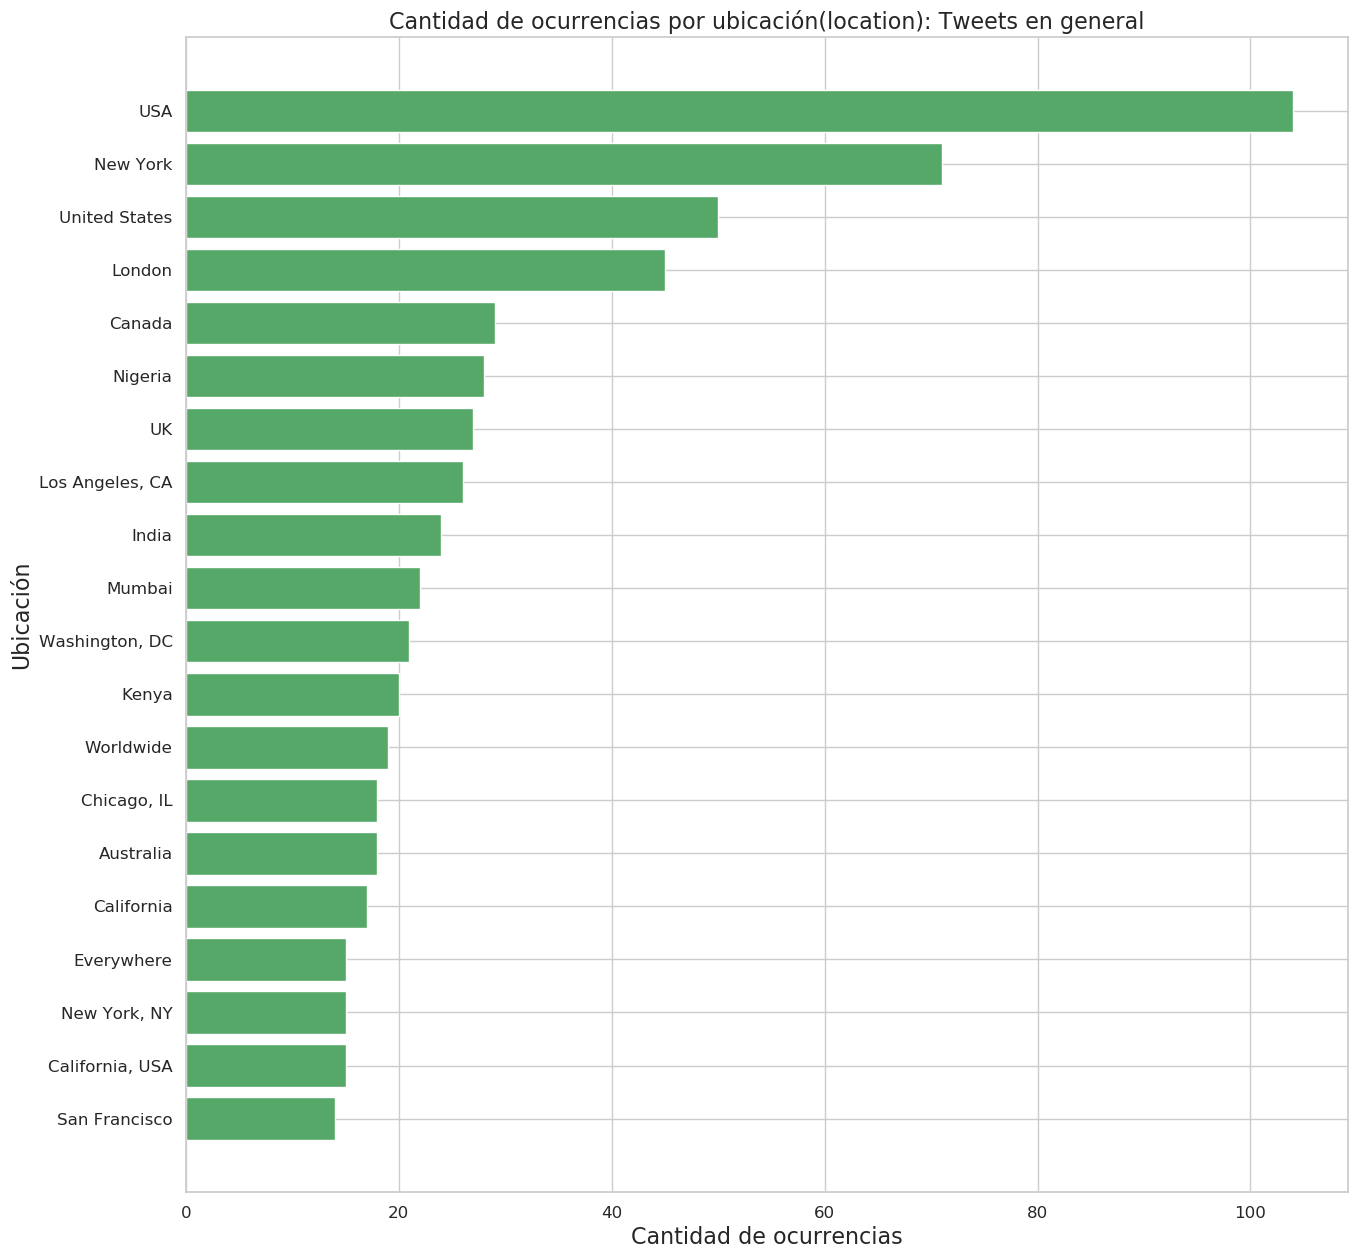

In [2171]:
# Tamaño
plt.figure(figsize=(15,15))
# Título
plt.title('Cantidad de ocurrencias por ubicación(location): Tweets en general', fontsize=16)
# Eje X
plt.xlabel('Cantidad de ocurrencias')
# Eje Y
plt.ylabel('Ubicación')
plt.barh(y=top_n_general.Lugar, width=top_n_general.General, color='C2')

plt.show()

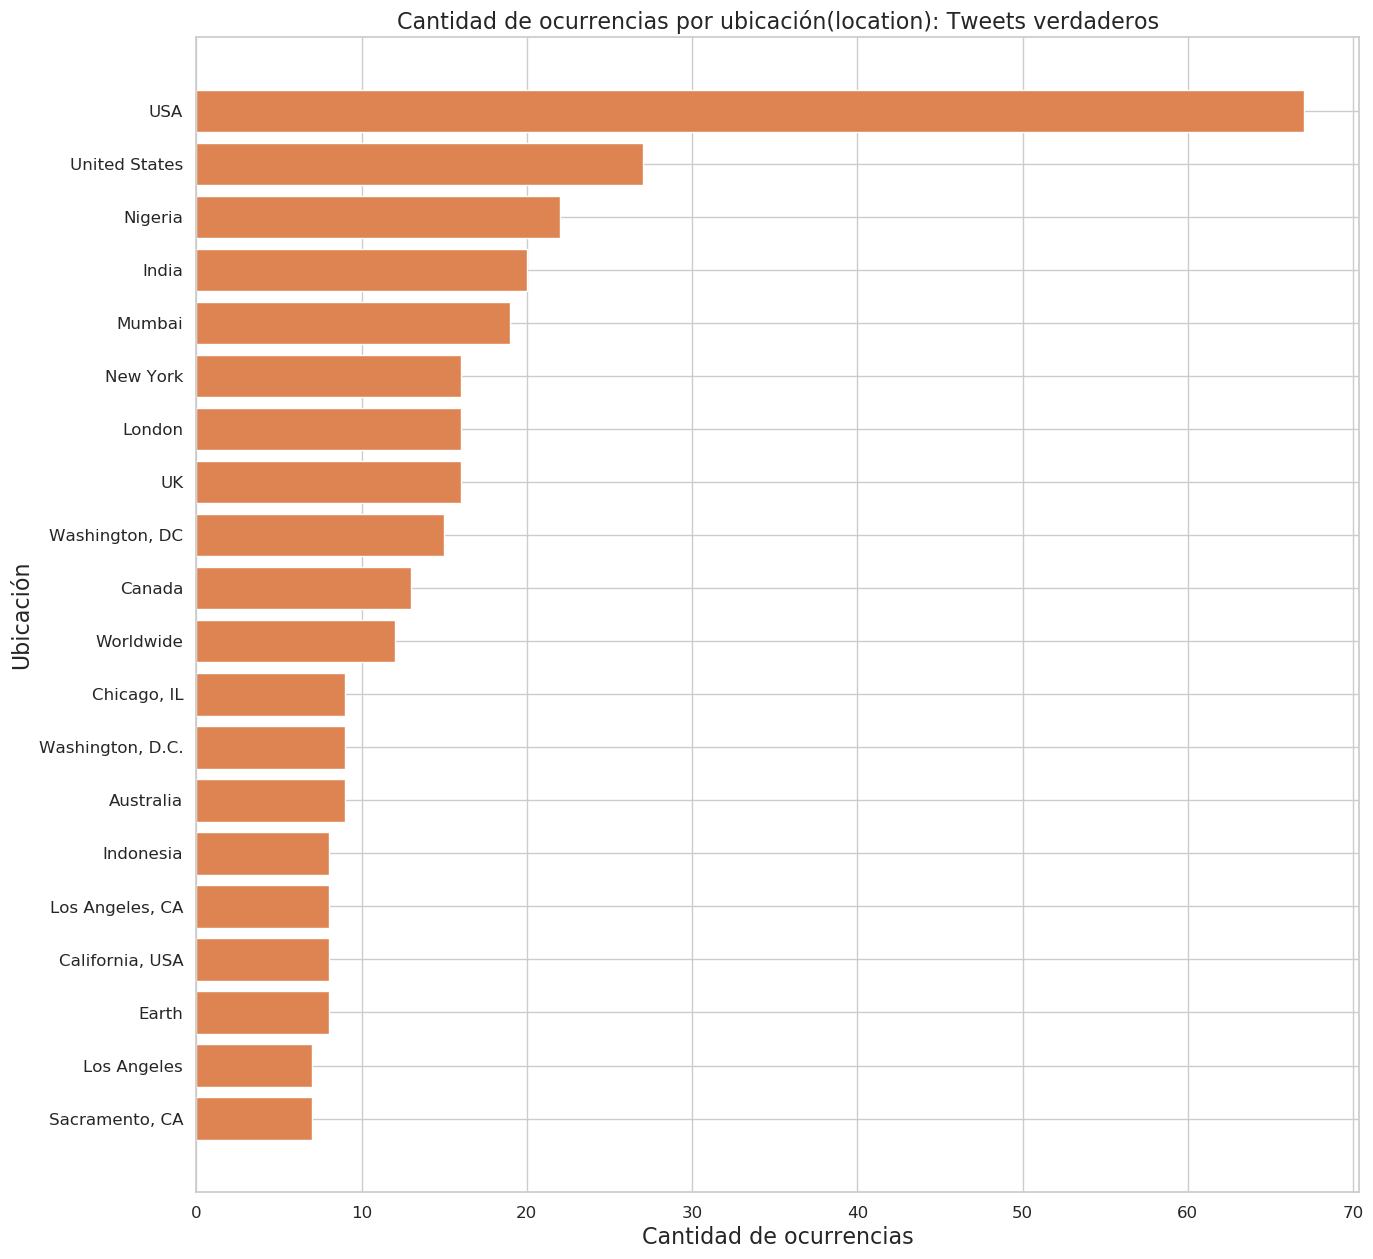

In [2172]:
# Tamaño
plt.figure(figsize=(15,15))
# Título
plt.title('Cantidad de ocurrencias por ubicación(location): Tweets verdaderos', fontsize=16)
# Eje X
plt.xlabel('Cantidad de ocurrencias')
# Eje Y
plt.ylabel('Ubicación')
plt.barh(y=top_n_verdaderos.Lugar, width=top_n_verdaderos.Verdaderos, color='C1')

plt.show()

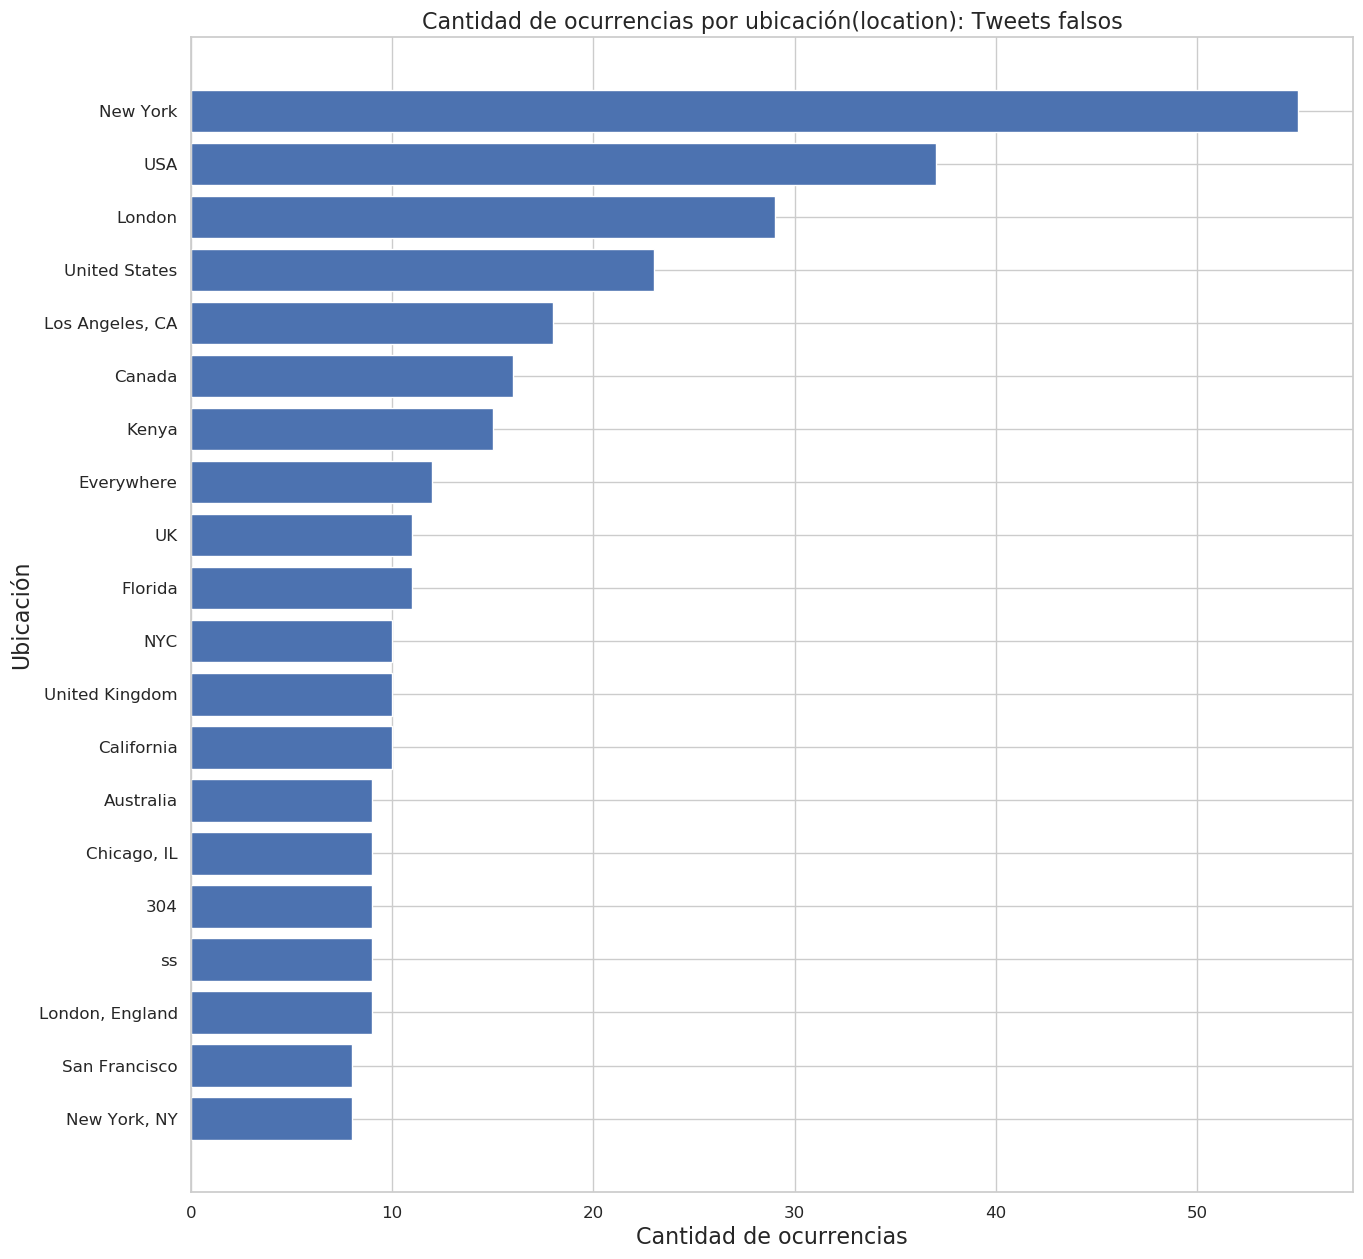

In [2173]:
# Tamaño
plt.figure(figsize=(15,15))
# Título
plt.title('Cantidad de ocurrencias por ubicación(location): Tweets falsos', fontsize=16)
# Eje X
plt.xlabel('Cantidad de ocurrencias')
# Eje Y
plt.ylabel('Ubicación')

plt.barh(y=top_n_falsos.Lugar, width=top_n_falsos.Falsos, color='C0')

plt.show()

Conclusión de los 3 gráficos

## Para 'sin location'

In [2174]:
df_ver_loc = tweets_reales[tweets_reales['location'] == 'sin location'].groupby(['location'])['target'].agg(['size'])
df_ver_loc.columns = ['tweets_verdaderos']

df_falsos_loc = tweets_falsos[tweets_falsos['location'] == 'sin location'].groupby(['location'])['target'].agg(['size'])
df_falsos_loc.columns = ['tweets_falsos']

df_location = pd.merge(df_falsos_loc, df_ver_loc, on='location', how='outer')
df_location['tweets_verdaderos'].fillna(0, inplace=True)
df_location['tweets_falsos'].fillna(0, inplace=True)
df_location = df_location.loc[(df_location.tweets_falsos >10) | (df_location.tweets_verdaderos > 10)] 
df_location.sort_index()


,tweets_falsos,tweets_verdaderos
location,,
sin location,1458,1075


## Tweets falsos o verdaderos por location

In [2175]:
df_ver_loc = tweets_reales[tweets_reales['location'] != 'sin location'].groupby(['location'])['target'].agg(['size'])
df_ver_loc.columns = ['tweets_verdaderos']

df_falsos_loc = tweets_falsos[tweets_falsos['location'] != 'sin location'].groupby(['location'])['target'].agg(['size'])
df_falsos_loc.columns = ['tweets_falsos']

df_location = pd.merge(df_falsos_loc, df_ver_loc, on='location', how='outer')
df_location['tweets_verdaderos'].fillna(0, inplace=True)
df_location['tweets_falsos'].fillna(0, inplace=True)
df_location = df_location.loc[(df_location.tweets_falsos >10) | (df_location.tweets_verdaderos > 10)] 
df_location.sort_index()

,tweets_falsos,tweets_verdaderos
location,,
Canada,16.00,13.00
Everywhere,12.00,3.00
Florida,11.00,3.00
India,4.00,20.00
Kenya,15.00,5.00
London,29.00,16.00
"Los Angeles, CA",18.00,8.00
Mumbai,3.00,19.00
New York,55.00,16.00


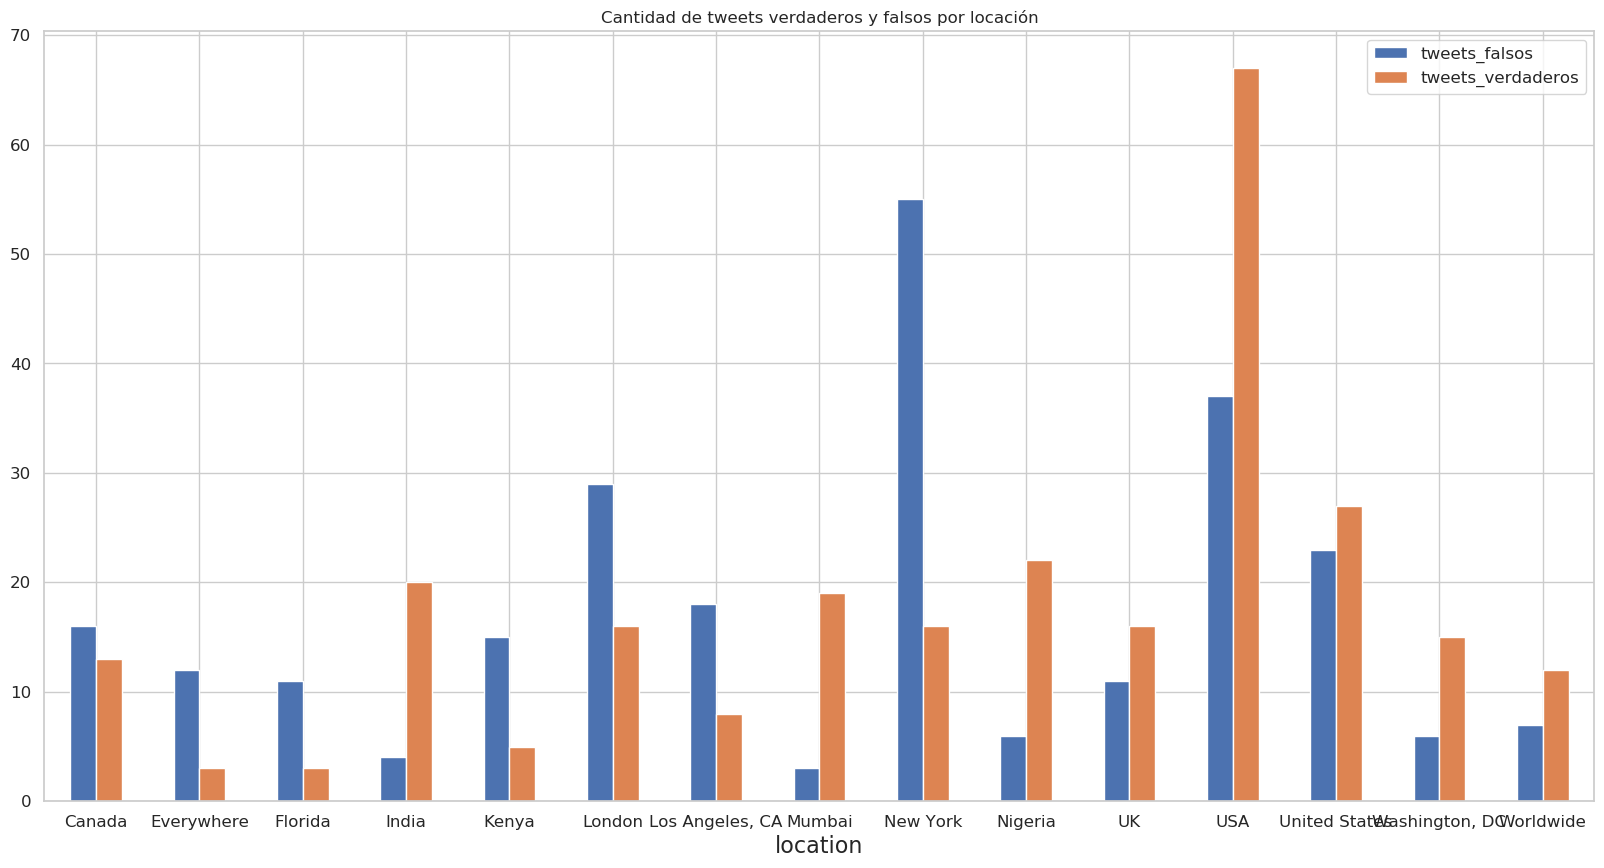

In [2176]:
df_location.plot(kind = 'bar', figsize = (20, 10), rot = 0, title = "Cantidad de tweets verdaderos y falsos por locación")

Se observa que "Nueva York" tiene una alta concentración de tweets falsos mientras que "USA" tiene casi mayoria de tweets verdaderos. Mumbai e India, si bien no tienen tantos tweets como los anteriores, tienen una mayoria de tweets verdaderos. (continuar)
Obviamos el hecho de que Nueva York queda en USA ya que no unimos a ninguna ciudad o estado con su país.

## 2.5 Relación entre el largo del texto y el target

Ahora veremos que relación hay entre la longitud del tweet y su veracidad.
Primero analizaremos la longitud sola para tener una idea general y luego lo uniremos con el target.

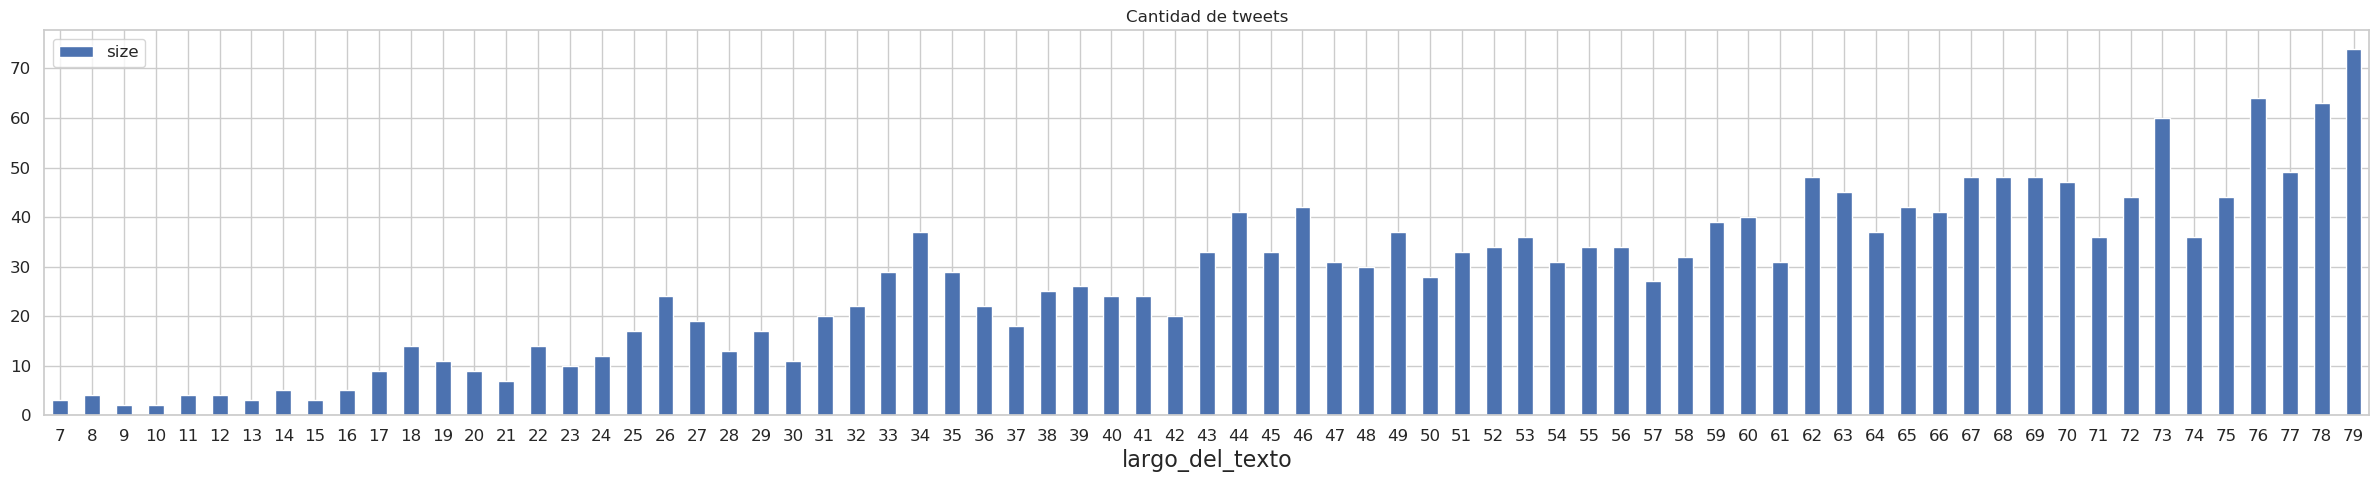

In [2177]:
cantidad_de_tweets1 = df_ext.loc[(df_ext.largo_del_texto < 80)]
cantidad_de_tweets1 = cantidad_de_tweets1.groupby(['largo_del_texto'])['largo_del_texto'].agg(['size'])
cantidad_de_tweets1.plot(kind = 'bar', figsize = (30, 5), rot = 0, title = "Cantidad de tweets")

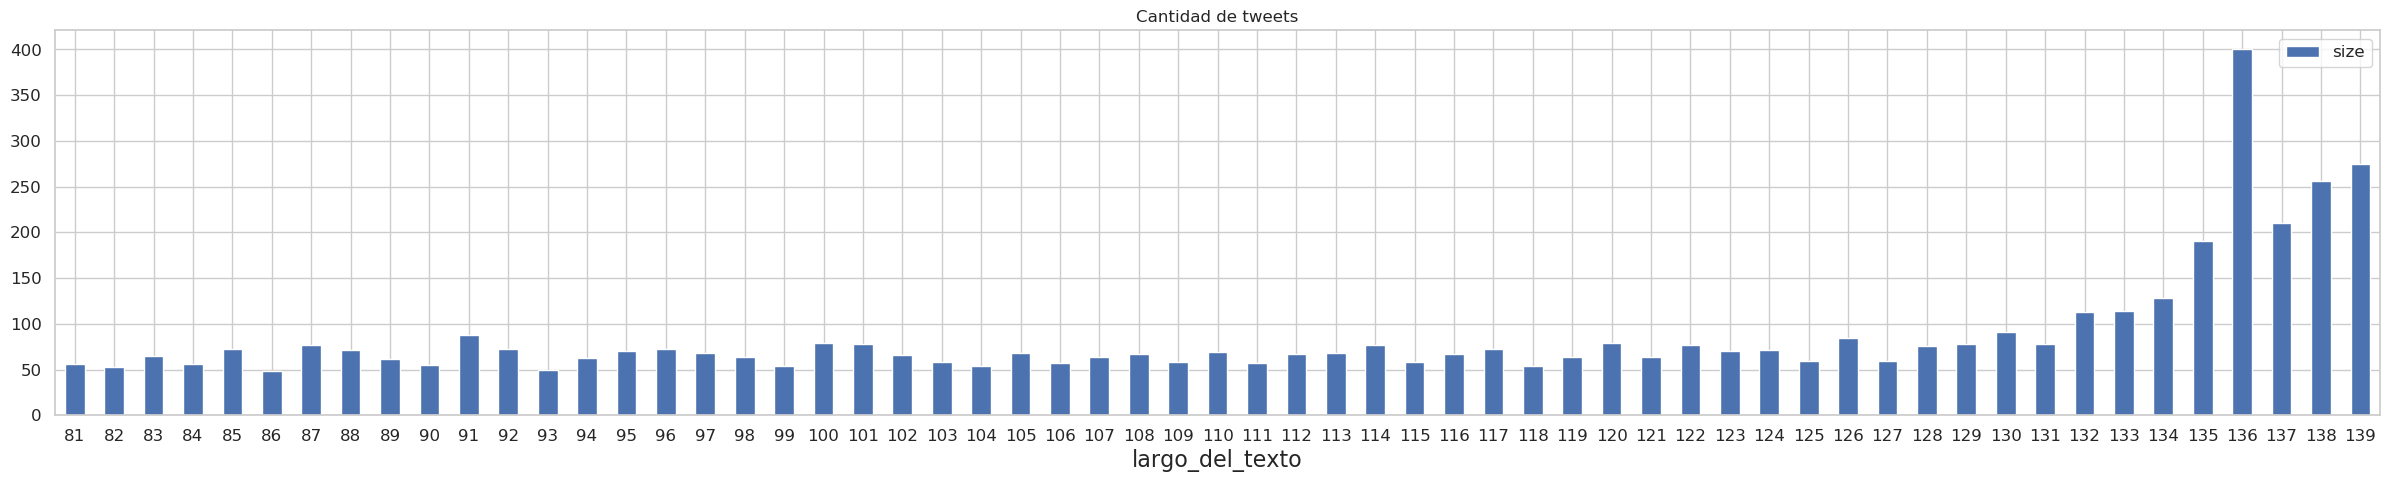

In [2178]:
cantidad_de_tweets2 = df_ext.loc[(df_ext.largo_del_texto > 80) & (df_ext.largo_del_texto < 140)]
cantidad_de_tweets2 = cantidad_de_tweets2.groupby(['largo_del_texto'])['largo_del_texto'].agg(['size'])
cantidad_de_tweets2.plot(kind = 'bar', figsize = (30, 5), rot = 0, title = "Cantidad de tweets")

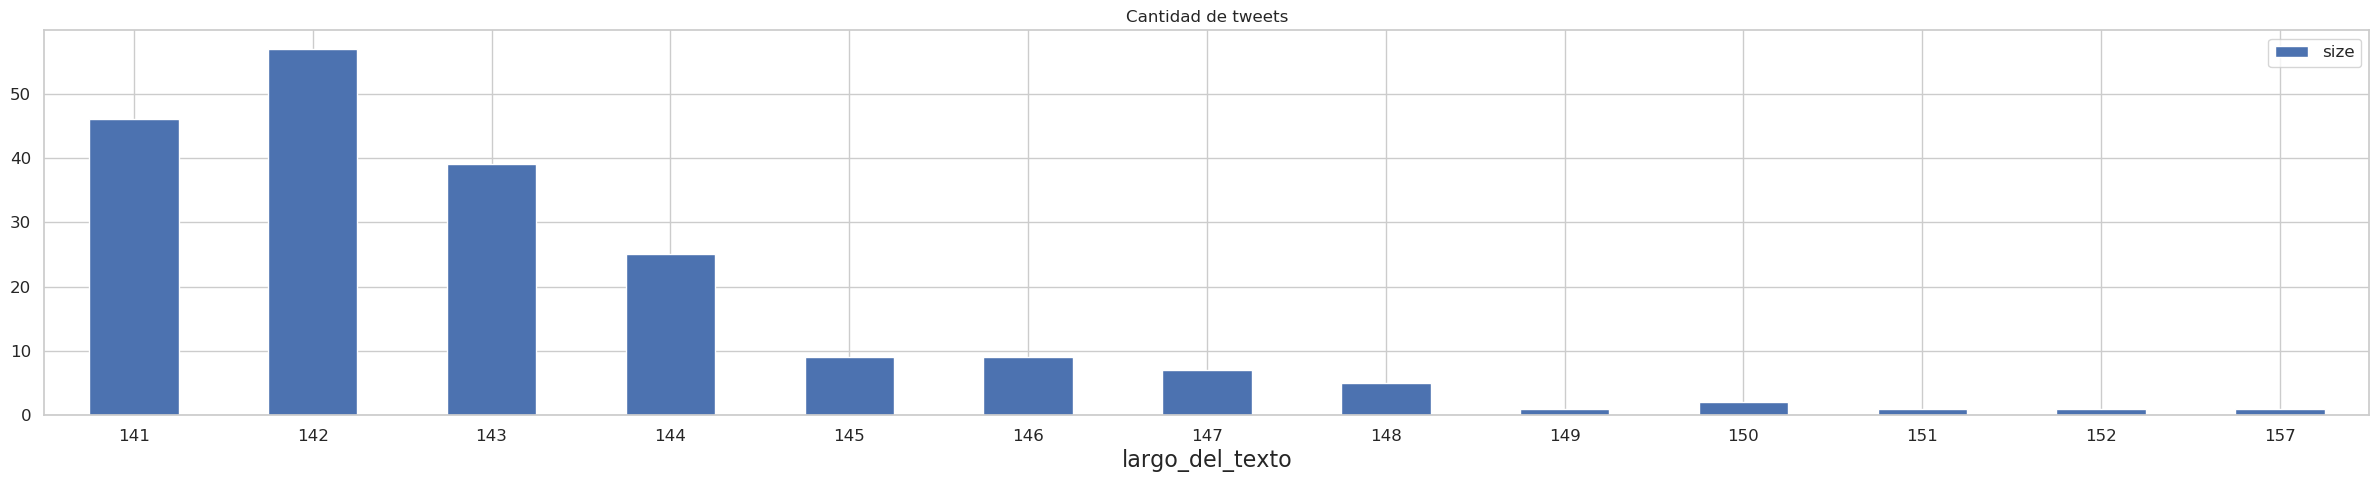

In [2179]:
cantidad_de_tweets3 = df_ext.loc[(df_ext.largo_del_texto > 140)]
cantidad_de_tweets3 = cantidad_de_tweets3.groupby(['largo_del_texto'])['largo_del_texto'].agg(['size'])
cantidad_de_tweets3.plot(kind = 'bar', figsize = (30, 5), rot = 0, title = "Cantidad de tweets")

Podemos observar que hasta los 130 caracteres, las cantidades no se diferencian demasiado, siempre estan por debajo de 100, luego hay un crecimiento considerable y luego vuelve a bajar.
Mejorar

In [2180]:
df_verdaderos = df_ext[df_ext['target'] == 1].groupby(['largo_del_texto'])['target'].agg(['size'])
df_falsos = df_ext[df_ext['target'] == 0].groupby(['largo_del_texto'])['target'].agg(['size'])

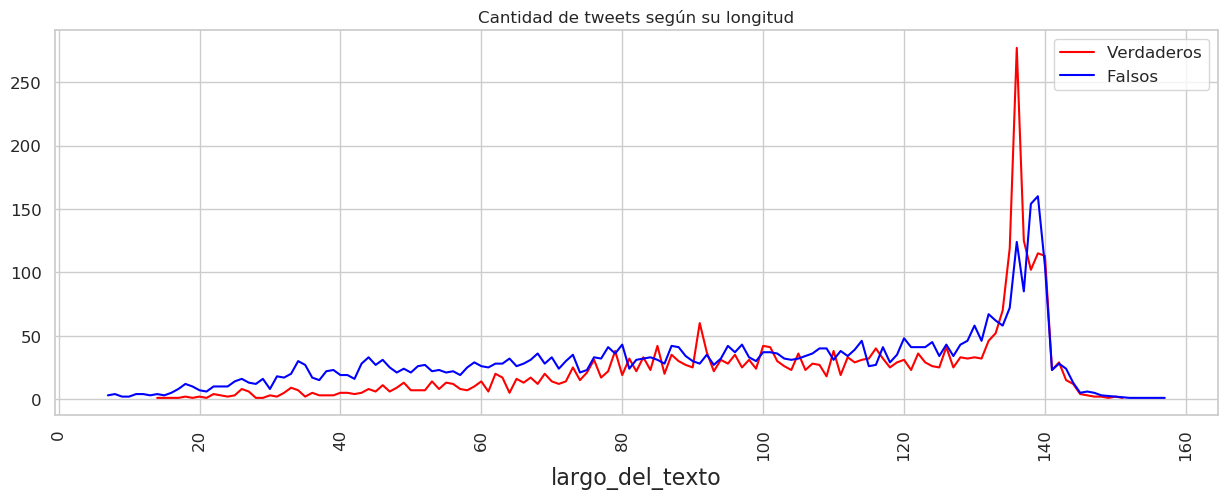

In [2181]:
df_verdaderos['size'].plot(figsize = (15,5), rot = 90, title = "Cantidad de tweets según su longitud", color = "Red",label = 'Verdaderos', legend = ' ')
df_falsos['size'].plot(figsize = (15,5), rot = 90, color = "Blue",label = 'Falsos', legend = ' ')

Podemos observar que hasta los 65 caracteres, los tweets falsos siempre están por encima de los verdaderos por una ligera diferencia, luego esa diferencia se achica pero a partir de los 130, ocurre un pico importante en el que los tweets verdaderos superan ampliamente a los falsos.

Lo graficaremos con barras para que se aprecie mejor, en este caso solo nos quedaremos con la ultima sección que es la que nos interesa.

In [2182]:
df_largo = df_ext.loc[(df_ext.largo_del_texto > 99) & (df_ext.largo_del_texto < 141)]
df_largo = df_largo.groupby(['largo_del_texto', 'target']).agg({'target': 'count'})
df_largo = df_largo.unstack(level=1)
df_largo = df_largo.reset_index()
df_largo = df_largo.droplevel(0, axis=1)
df_largo.columns=['largo_del_texto', 'Tweets falsos', 'Tweets verdaderos'] 
df_largo['Tweets verdaderos'].fillna(0, inplace=True)
df_largo['Tweets falsos'].fillna(0, inplace=True)
df_largo['largo_del_texto'].fillna('empty', inplace=True)
df_largo = df_largo.set_index('largo_del_texto')
df_largo = df_largo.sort_values('largo_del_texto', ascending = True).head(ranking)

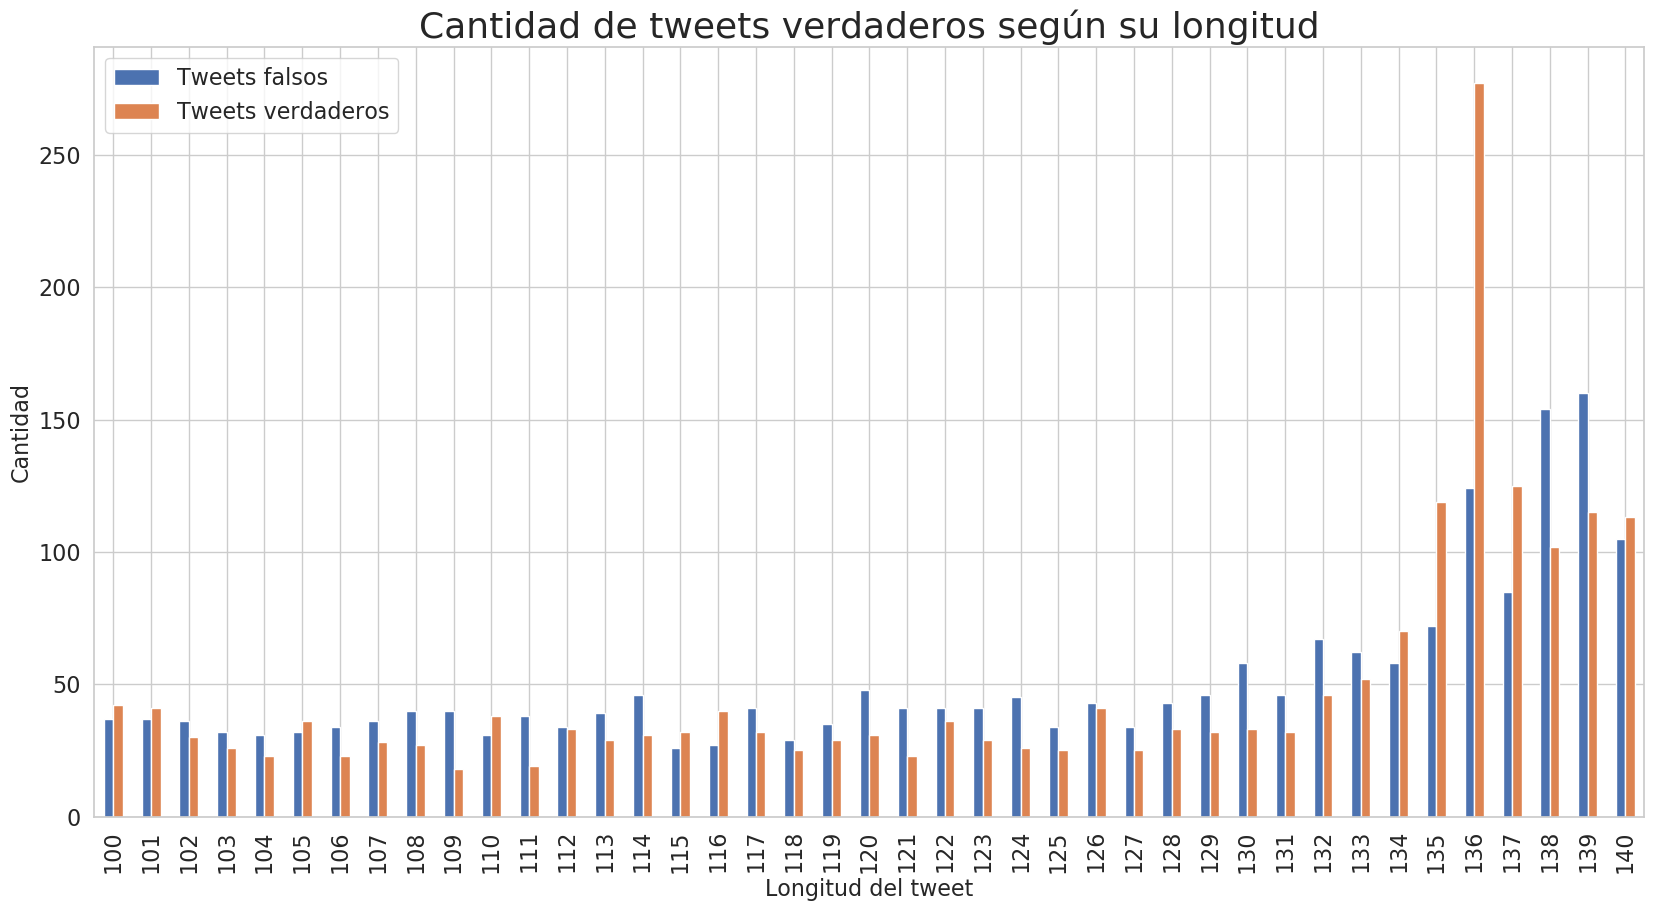

In [2183]:
ax = df_largo.plot(kind="bar", stacked=False, fontsize= 16)
plt.title("Cantidad de tweets verdaderos según su longitud", fontsize=26)
plt.xlabel("Longitud del tweet", fontsize= 16)
plt.ylabel("Cantidad", fontsize= 16)
plt.legend(fontsize=16)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    #ax.annotate("{:.0%}".format(height/100), xy=(x+0.07, y + height + 1), fontsize=16)

Aquí se aprecia mejor que hasta los 134 caracteres, la diferencia es minima pero luego hay un importante crecimiento de los tweets verdaderos ( continuar ) 

## 2.6 Relación entre location y keyword

In [2184]:
df_loc_key = df.groupby(['location','keyword'])['keyword'].agg(['size'])
df_loc_key.columns = ['ocurrencia']
df_loc_key = df_loc_key.reset_index()

In [2185]:
df_loc_key = df_loc_key.set_index(df_loc_key.keyword)

#df_usa = df_usa.drop(['location','keyword'], axis=1)
df_loc_key = df_loc_key.drop(['keyword'], axis=1)
df_loc_key = df_loc_key.loc[df_loc_key.ocurrencia > 5]
df_loc_key

,location,ocurrencia
keyword,,
derail,Road to the Billionaires Club,6
aftershock,304,9
derailment,India,7
loud%20bang,Kenya,16
detonate,"Morioh, Japan",6
...,...,...
wounds,sin location,6
wreck,sin location,10
wreckage,sin location,11


## 2.7 Relación entre la locación y el largo del texto

In [2186]:
df_loc_largo = df_ext.groupby(['location','largo_del_texto'])['keyword'].agg(['size'])
df_loc_largo.columns = ['ocurrencia']
df_loc_largo = df_loc_largo.reset_index()
df_loc_largo = df_loc_largo.loc[df_loc_largo.largo_del_texto > 100]

In [2187]:
df_loc_largo = df_loc_largo.set_index(df_loc_largo.largo_del_texto)

#df_usa = df_usa.drop(['location','keyword'], axis=1)
df_loc_largo = df_loc_largo.drop(['largo_del_texto'], axis=1)
df_loc_largo = df_loc_largo.loc[df_loc_largo.ocurrencia > 3]
df_loc_largo

,location,ocurrencia
largo_del_texto,,
103,Happily Married with 2 kids,4
135,London,4
136,Mumbai,12
133,New York,4
138,New York,4
139,New York,42
136,Nigeria,4
140,Nigeria,6
134,Pedophile hunting ground,4
